***Fatemeh Amiri***

**student number = 40202424**

**Mini Project2 - Machine Learning**

*Spring 2024*

#Question1

##Part1

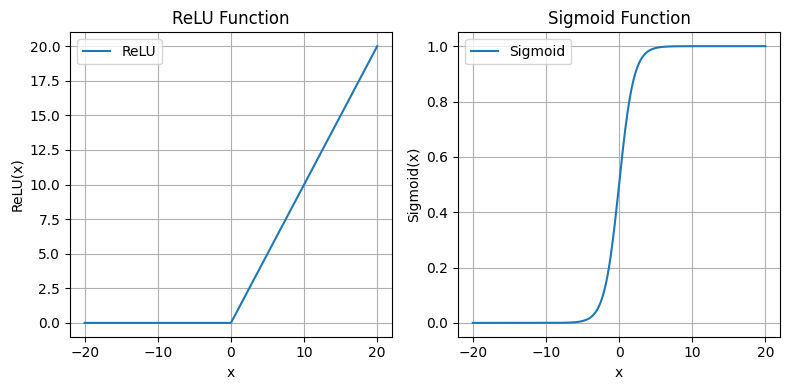

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ReLU function
def relu(x):
    return np.maximum(0, x)

# Define the Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate a range of values from -10 to 10 for x
x = np.linspace(-20, 20, 400)

# Compute the ReLU and Sigmoid values
y_relu = relu(x)
y_sigmoid = sigmoid(x)

# Create the plot
plt.figure(figsize=(8, 4))

# Plotting ReLU
plt.subplot(1, 2, 1)
plt.plot(x, y_relu, label="ReLU")
plt.title("ReLU Function")
plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.grid(True)
plt.legend()

# Plotting Sigmoid
plt.subplot(1, 2, 2)
plt.plot(x, y_sigmoid, label="Sigmoid")
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

##Part2

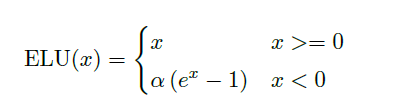

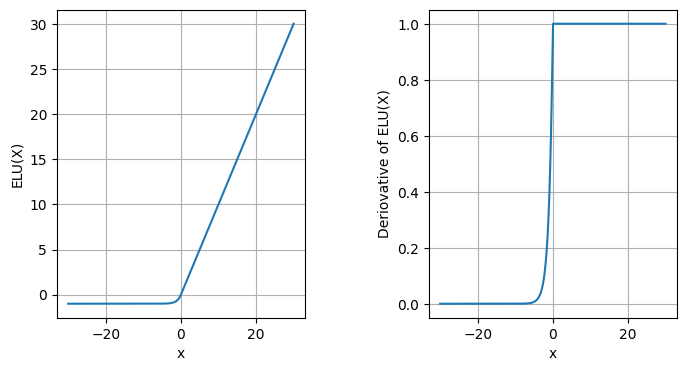

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.pyplot as pyplt

x = np.linspace(-30, 30, 2000)
plt.rcParams["figure.figsize"] = (8, 4)
alpha = 1
p = []
p_dot = []

for i in x :
  if i >= 0 :
    p.append(i)
    p_dot.append(1)
  else:
    p.append(alpha * (np.exp(i) - 1 ))
    p_dot.append(alpha*np.exp(i))

plt.subplot(1,2,1)
plt.plot(x,p)
plt.xlabel("x")
plt.ylabel("ELU(X)")
plt.grid()
plt.subplot(1,2,2)
plt.plot(x,p_dot)
plt.xlabel("x")
plt.ylabel("Deriovative of ELU(X)")
plt.grid()
plt.subplots_adjust(wspace=0.5, hspace=0.8)
plt.show()

**Checking the performance of RelU function for different alpha :**

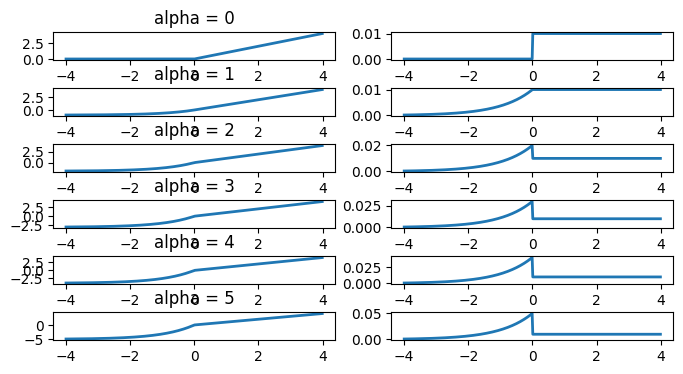

In [3]:
x = np.arange(-4,4,0.01)
f = np.zeros_like(x)

num = range(0,6)
for j in num:
    alpha = j
    for i in range(len(f)):

        if x[i] >= 0:
            f[i] = x[i]
        elif x[i] < 0 :
            f[i] = alpha * (np.exp(x[i]) - 1)
    df = np.gradient(f)

    # Plot
    plt.subplot(len(num),2,2*(j+1)-1)
    plt.plot(x, f, linewidth=2)
    plt.title(f'alpha = {alpha}')
    plt.subplot(len(num),2,2*(j+1))
    plt.plot(x, df, linewidth=2)
    plt.subplots_adjust(hspace=1)

plt.show()

##Part3

**we are doing classification without activation function:**

In [18]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

 #define Muculloch pittis
class McCulloch_Pitts_neuron():
  def __init__(self, weights , threshold):
    self.weights = weights
    self.threshold = threshold

  def model(self, X ):
    if ((self.weights @ X)  + self.threshold) >= 0 :
      return 1
    else :
      return 0

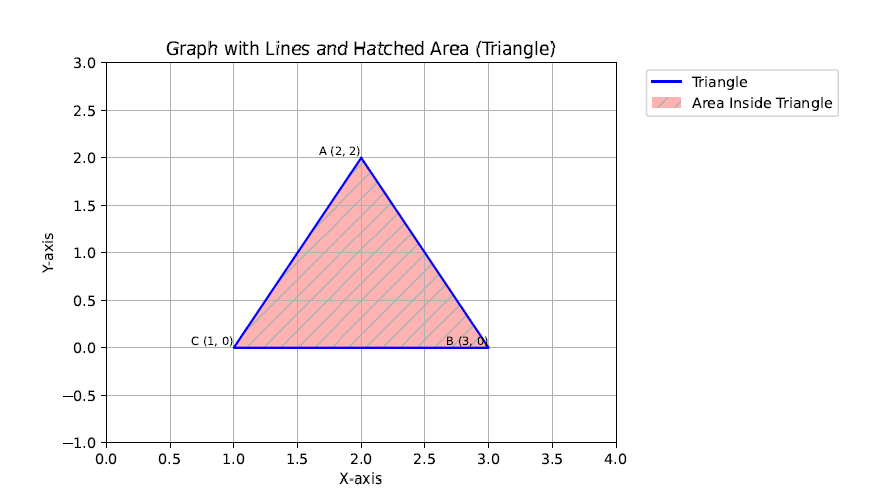

In [32]:
#define model for dataset
def Triangle(x,y):
  #The equation of the lines of the triangle
  neur1 = McCulloch_Pitts_neuron([-2 , -1] ,  6 )
  neur2 = McCulloch_Pitts_neuron([+2 , -1] , -2 )
  neur3 = McCulloch_Pitts_neuron([ 0 , +1] ,  0 )
  neur4 = McCulloch_Pitts_neuron([1 , 1 , 1] , -3 )

  zone1 = neur1.model(np.array([x,y]))
  zone2 = neur2.model(np.array([x,y]))
  zone3 = neur3.model(np.array([x,y]))
  zone4 = neur4.model(np.array([zone1 , zone2 , zone3]))

  return list([zone4])

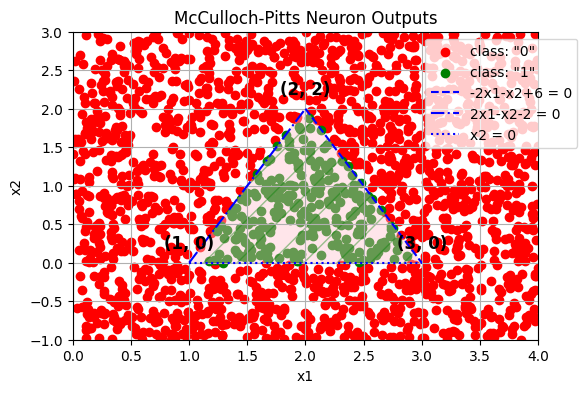

In [34]:
num_point = 2000
x_val = np.random.uniform( 0 , 4 , num_point )      #x_asis
y_val = np.random.uniform( -1 , 3 , num_point )     #y_asis

red_point = []                  # outside zone
green_point = []                #  inside zone

for i in range(num_point):
  flag = Triangle(x_val[i] , y_val[i])
  if flag == [0] :
    red_point.append((x_val[i] , y_val[i]))
  else:
    green_point.append((x_val[i] , y_val[i]))


# Separate x and y values for red and green points
red_x, red_y = zip(*red_point)
green_x, green_y = zip(*green_point)

# Plotting
plt.figure(figsize=(6, 4))
plt.scatter(red_x, red_y, color='red', label='class: "0"')
plt.scatter(green_x, green_y, color='green', label='class: "1"')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('McCulloch-Pitts Neuron Outputs')
plt.grid(True)

# Annotating the vertices
triangle_vertices = [(2, 2), (3, 0), (1, 0)]
for x, y in triangle_vertices:
    plt.annotate(f'({x}, {y})', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold', fontsize = 12)

x_l1 = [2,3]
y_l1 = [2,0]
x_l2 = [1,2]
y_l2 = [0,2]
x_l3 = [1,3]
y_l3 = [0,0]
# Plotting lines with legends
plt.plot(x_l1 , y_l1 , color='blue', linestyle='--', label='-2x1-x2+6 = 0')
plt.plot(x_l2 , y_l2 , color='blue', linestyle='-.' , label='2x1-x2-2 = 0')
plt.plot(x_l3 , y_l3 , color='blue', linestyle=':' , label='x2 = 0')

# Extracting x and y coordinates
triangle_x = [v[0] for v in triangle_vertices]
triangle_y = [v[1] for v in triangle_vertices]

# Adding the first vertex at the end to close the polygon
triangle_x.append(triangle_vertices[0][0])
triangle_y.append(triangle_vertices[0][1])

# Filling the triangle with hatching
plt.fill(triangle_x, triangle_y, facecolor='pink', edgecolor='green',  fill=True, hatch='/', linewidth=0.1, alpha=0.4)


# Set axis limits
plt.xlim(0, 4)
plt.ylim(-1, 3)

# Position the legends at the top and right
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.0))

plt.show()

**In this step, we check the effect of adding different activation functions:**

***1) classification with sigmoid as activation function:***

In [63]:
tol = 0.0001

In [64]:
class McCulloch_Pitts_neuron:
    def __init__(self, weights, threshold):
        self.weights = np.array(weights)
        self.threshold = threshold

    def model(self, X):
        X = np.array(X)
        linear_output = self.weights @ X + self.threshold
        return self.activation(linear_output)

    def activation(self, linear_output):
        # Default to the original threshold logic without an activation function
        return 1 if linear_output >= 0 else 0

    def set_activation_function(self, activation_func):
        self.activation = activation_func

In [65]:
# Define sigmoid and ReLU functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

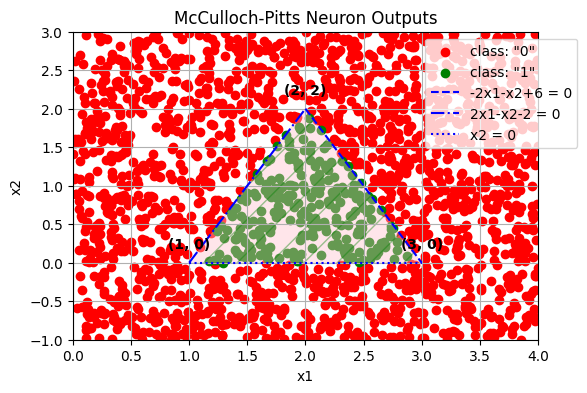

In [66]:
def Triangle(x,y):
  neur1 = McCulloch_Pitts_neuron([-2 , -1] ,  6+tol )
  # Set activation functions
  # neur1.set_activation_function(sigmoid)
  neur2 = McCulloch_Pitts_neuron([+2 , -1] , -2+tol )
  # neur2.set_activation_function(sigmoid)
  neur3 = McCulloch_Pitts_neuron([ 0 , +1] ,  0+tol )

  neur4 = McCulloch_Pitts_neuron([1 , 1 , 1] , -3+tol )
  neur4.set_activation_function(sigmoid)

  zone1 = neur1.model(np.array([x,y]))
  zone2 = neur2.model(np.array([x,y]))
  zone3 = neur3.model(np.array([x,y]))
  zone4 = neur4.model(np.array([zone1 , zone2 , zone3]))

  return list([zone4])

#-----------------------------------------------------------
red_point = []      # outside zone
green_point = []    #  inside zone

for i in range(num_point):
  flag = Triangle(x_val[i] , y_val[i])
  if flag < [0.5] :
    red_point.append((x_val[i] , y_val[i]))
  else:
    green_point.append((x_val[i] , y_val[i]))


# Separate x and y values for red and green points
red_x, red_y = zip(*red_point)
green_x, green_y = zip(*green_point)

# Plotting
plt.figure(figsize=(6, 4))
plt.scatter(red_x, red_y, color='red', label='class: "0"')
plt.scatter(green_x, green_y, color='green', label='class: "1"')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('McCulloch-Pitts Neuron Outputs')
plt.grid(True)

# Annotating the vertices
triangle_vertices = [(2, 2), (3, 0), (1, 0)]
for x, y in triangle_vertices:
    plt.annotate(f'({x}, {y})', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold', fontsize = 10)

x_l1 = [2,3]
y_l1 = [2,0]
x_l2 = [1,2]
y_l2 = [0,2]
x_l3 = [1,3]
y_l3 = [0,0]
# Plotting lines with legends
plt.plot(x_l1 , y_l1 , color='blue', linestyle='--', label='-2x1-x2+6 = 0')
plt.plot(x_l2 , y_l2 , color='blue', linestyle='-.' , label='2x1-x2-2 = 0')
plt.plot(x_l3 , y_l3 , color='blue', linestyle=':' , label='x2 = 0')
# Extracting x and y coordinates
triangle_x = [v[0] for v in triangle_vertices]
triangle_y = [v[1] for v in triangle_vertices]

# Adding the first vertex at the end to close the polygon
triangle_x.append(triangle_vertices[0][0])
triangle_y.append(triangle_vertices[0][1])

# Filling the triangle with hatching
plt.fill(triangle_x, triangle_y, facecolor='pink', edgecolor='green',  fill=True, hatch='/', linewidth=0.1, alpha=0.4)

# Set axis limits
plt.xlim(0, 4)
plt.ylim(-1, 3)

# Position the legends at the top and right
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))

plt.show()

***2) classification with RELU as activation function:***

In [58]:
class McCulloch_Pitts_neuron:
    def __init__(self, weights, threshold):
        self.weights = np.array(weights)
        self.threshold = threshold

    def model(self, X):
        X = np.array(X)
        linear_output = self.weights @ X + self.threshold
        return self.activation(linear_output)

    def activation(self, linear_output):
        # Default to the original threshold logic without an activation function
        return 1 if linear_output >= 0 else 0

    def set_activation_function(self, activation_func):
        self.activation = activation_func

In [59]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

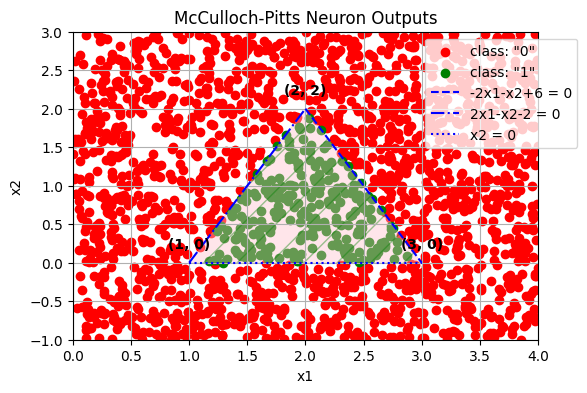

In [67]:
tol = 0.0001

def Triangle(x,y):
  neur1 = McCulloch_Pitts_neuron([-2 , -1] ,  6+tol )
  # Set activation functions
  # neur1.set_activation_function(relu)
  neur2 = McCulloch_Pitts_neuron([+2 , -1] , -2+tol )
  # neur2.set_activation_function(relu)
  neur3 = McCulloch_Pitts_neuron([ 0 , +1] ,  0+tol )
  # neur3.set_activation_function(relu)

  neur4 = McCulloch_Pitts_neuron([1 , 1 , 1] , -3+tol )
  neur4.set_activation_function(relu)

  zone1 = neur1.model(np.array([x,y]))
  zone2 = neur2.model(np.array([x,y]))
  zone3 = neur3.model(np.array([x,y]))
  zone4 = neur4.model(np.array([zone1 , zone2 , zone3]))

  return list([zone4])
#-------------------------------------------------------------

red_point = [] # outside zone
green_point = [] #  inside zone

for i in range(num_point):
  flag = Triangle(x_val[i] , y_val[i])
  if flag == [0] :
    red_point.append((x_val[i] , y_val[i]))
  else:
    green_point.append((x_val[i] , y_val[i]))


# Separate x and y values for red and green points
red_x, red_y = zip(*red_point)
green_x, green_y = zip(*green_point)

# Plotting
plt.figure(figsize=(6, 4))
plt.scatter(red_x, red_y, color='red', label='class: "0"')
plt.scatter(green_x, green_y, color='green', label='class: "1"')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('McCulloch-Pitts Neuron Outputs')
plt.grid(True)

# Annotating the vertices
triangle_vertices = [(2, 2), (3, 0), (1, 0)]
for x, y in triangle_vertices:
    plt.annotate(f'({x}, {y})', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold', fontsize = 10)

x_l1 = [2,3]
y_l1 = [2,0]
x_l2 = [1,2]
y_l2 = [0,2]
x_l3 = [1,3]
y_l3 = [0,0]
# Plotting lines with legends
plt.plot(x_l1 , y_l1 , color='blue', linestyle='--' , label='-2x1-x2+6 = 0')
plt.plot(x_l2 , y_l2 , color='blue', linestyle='-.' , label='2x1-x2-2 = 0')
plt.plot(x_l3 , y_l3 , color='blue', linestyle=':' , label='x2 = 0')

# Extracting x and y coordinates
triangle_x = [v[0] for v in triangle_vertices]
triangle_y = [v[1] for v in triangle_vertices]

# Adding the first vertex at the end to close the polygon
triangle_x.append(triangle_vertices[0][0])
triangle_y.append(triangle_vertices[0][1])

# Filling the triangle with hatching
plt.fill(triangle_x, triangle_y, facecolor='pink', edgecolor='green',  fill=True, hatch='/', linewidth=0.1, alpha=0.4)

# Set axis limits
plt.xlim(0, 4)
plt.ylim(-1, 3)

# Position the legends at the top and right
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.show()

#Question2

##Part1

In [2]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import random
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
np.set_printoptions(threshold=sys.maxsize)

In [3]:
!pip install --upgrade --no-cach-dir gdown
! gdown 1MeHr0QxBWrG_VAHgRxsJpgrmjIebR47m
! gdown 1NcFe97vF2n4HYHHy3hC9a_Y2hKfhUAVD
! gdown 15Yf8lTkjYk04UF7PzgQH8IPdKDfZSvHP
! gdown 1WjSZjrA_izOw110CNgAVkfJYqdtudOEv


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --no-cach-dir
Downloading...
From (original): https://drive.google.com/uc?id=1MeHr0QxBWrG_VAHgRxsJpgrmjIebR47m
From (redirected): https://drive.google.com/uc?id=1MeHr0QxBWrG_VAHgRxsJpgrmjIebR47m&confirm=t&uuid=0c9aad2a-a286-4281-b5c2-47dbf6e6a867
To: /content/97.mat
100% 3.90M/3.90M [00:00<00:00, 83.0MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1NcFe97vF2n4HYHHy3hC9a_Y2hKfhUAVD
From (redirected): https://drive.google.com/uc?id=1NcFe97vF2n4HYHHy3hC9a_Y2hKfhUAVD&confirm=t&uuid=9e1dfd8e-253d-4912-81fa-73e5670202b1
To: /content/105.mat
100% 2.91M/2.91M [00:00<00:00, 90.8MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/download.py:32:

In [4]:
! pip install scipy
import scipy.io as sio
from scipy.io import loadmat

data_n = sio.loadmat('/content/drive/MyDrive/MachineLearning/HW2/97.mat')
data_f1 = sio.loadmat('/content/drive/MyDrive/MachineLearning/HW2/105.mat')
data_f2 = sio.loadmat('/content/drive/MyDrive/MachineLearning/HW2/118.mat')
data_f3 = sio.loadmat('/content/drive/MyDrive/MachineLearning/HW2/130.mat')

In [5]:
#columne of normal and fualts
columns_n = list(data_n.keys())
columns_f1 = list(data_f1.keys())
columns_f2 = list(data_f2.keys())
columns_f3 = list(data_f3.keys())
print (columns_n)
print (columns_f1)
print (columns_f2)
print (columns_f3)

['__header__', '__version__', '__globals__', 'X097_DE_time', 'X097_FE_time', 'X097RPM']
['__header__', '__version__', '__globals__', 'X105_DE_time', 'X105_FE_time', 'X105_BA_time', 'X105RPM']
['__header__', '__version__', '__globals__', 'X118_DE_time', 'X118_FE_time', 'X118_BA_time', 'X118RPM']
['__header__', '__version__', '__globals__', 'X130_DE_time', 'X130_FE_time', 'X130_BA_time', 'X130RPM']


In [6]:
columns_n = list(data_n.keys())[-3:]
columns_f1 = list(data_f1.keys())[-4:]
columns_f2 = list(data_f2.keys())[-4:]
columns_f3 = list(data_f3.keys())[-4:]
all_columns= np.concatenate((columns_n, columns_f1, columns_f2,  columns_f3 ))
print(all_columns)

['X097_DE_time' 'X097_FE_time' 'X097RPM' 'X105_DE_time' 'X105_FE_time'
 'X105_BA_time' 'X105RPM' 'X118_DE_time' 'X118_FE_time' 'X118_BA_time'
 'X118RPM' 'X130_DE_time' 'X130_FE_time' 'X130_BA_time' 'X130RPM']


In [7]:
M = 300
N = 300
matrices = {}

for col in all_columns:
    mat = np.zeros((M, N))
    for j in range(M):
        if col in data_n:
            if j + N <= len(data_n[col]):
                mat[j, :] = data_n[col][j:j + N].reshape(-1,)
            else:
                mat[j, :] = np.nan
        elif col in data_f1:
            if j + N <= len(data_f1[col]):
                mat[j, :] = data_f1[col][j:j + N].reshape(-1,)
            else:
                mat[j, :] = np.nan
        elif col in data_f2:
            if j + N <= len(data_f2[col]):
                mat[j, :] = data_f2[col][j:j + N].reshape(-1,)
            else:
                mat[j, :] = np.nan
        elif col in data_f3:
            if j + N <= len(data_f3[col]):
                mat[j, :] = data_f3[col][j:j + N].reshape(-1,)
            else:
                mat[j, :] = np.nan
        else:
            mat[j, :] = np.nan
    matrices[col] = mat

for i, col in enumerate(all_columns):
    mat_size = matrices[col].shape
    print(f'Class "{col}"\'s matrix has the shape of {mat_size}')

Class "X097_DE_time"'s matrix has the shape of (300, 300)
Class "X097_FE_time"'s matrix has the shape of (300, 300)
Class "X097RPM"'s matrix has the shape of (300, 300)
Class "X105_DE_time"'s matrix has the shape of (300, 300)
Class "X105_FE_time"'s matrix has the shape of (300, 300)
Class "X105_BA_time"'s matrix has the shape of (300, 300)
Class "X105RPM"'s matrix has the shape of (300, 300)
Class "X118_DE_time"'s matrix has the shape of (300, 300)
Class "X118_FE_time"'s matrix has the shape of (300, 300)
Class "X118_BA_time"'s matrix has the shape of (300, 300)
Class "X118RPM"'s matrix has the shape of (300, 300)
Class "X130_DE_time"'s matrix has the shape of (300, 300)
Class "X130_FE_time"'s matrix has the shape of (300, 300)
Class "X130_BA_time"'s matrix has the shape of (300, 300)
Class "X130RPM"'s matrix has the shape of (300, 300)


There are 15 classes in total(Each class has 300 examples with a length of 300), since the question asked us to have one class for each Category ( one normal and 3 fault state) , we will choose one class from each category and proceed accordingly.

In [8]:
normal_mat = matrices['X097_DE_time']
fault1_mat = matrices['X105_DE_time']
fault2_mat = matrices['X118_DE_time']
fault3_mat = matrices['X130_DE_time']

*Feature extraction:*

In [9]:
class Features:

    def __init__(self,matrix):
        self.matrix = matrix
        self._extract()

    def _extract(self):
        self.features = {
            'standard deviation': stats.tstd(self.matrix, axis=1),
            'peak': np.max(self.matrix, axis=1),
            'skewness': stats.skew(self.matrix, axis=1),
            'square root mean': np.square(np.mean(np.sqrt(np.abs(self.matrix)), axis=1)),
            'kurtosis': stats.kurtosis(self.matrix, axis=1),
            'crest factor': np.max(self.matrix, axis=1) / np.sqrt(np.mean(np.square(self.matrix), axis=1)),
            'clearance factor': np.max(self.matrix, axis=1) / np.square(np.mean(np.sqrt(np.abs(self.matrix)), axis=1)),
            'mean': np.mean(self.matrix, axis=1),
            'absolute mean': np.mean(np.abs(self.matrix), axis=1),
            'root mean square': np.sqrt(np.mean(np.square(self.matrix), axis=1)),
        }

    def __getitem__(self,key):
        return self.features[key]


normal_features = Features(normal_mat)
fault1_features = Features(fault1_mat)
fault2_features = Features(fault2_mat)
fault3_features = Features(fault3_mat)

In [10]:
# Normal data label ---> 0
df_normal = pd.DataFrame(normal_features.features)
df_normal['label'] = np.zeros((df_normal.shape[0],), dtype='int8')

# Fault1 data label --> 1
df_fault1 = pd.DataFrame(fault1_features.features)
df_fault1['label'] = np.ones((df_fault1.shape[0],), dtype='int8')

# Fault2 data label --> 2
df_fault2 = pd.DataFrame(fault2_features.features)
df_fault2['label'] = np.full((df_fault2.shape[0],), 2, dtype='int8')

# Fault3 data label --> 3
df_fault3 = pd.DataFrame(fault3_features.features)
df_fault3['label'] = np.full((df_fault3.shape[0],), 3, dtype='int8')

# Stacking all datasets
df = pd.concat([df_normal, df_fault1, df_fault2, df_fault3], ignore_index=True)
df

,standard deviation,peak,skewness,square root mean,kurtosis,crest factor,clearance factor,mean,absolute mean,root mean square,label
0,0.083577,0.217794,-0.345679,0.062231,-0.398710,2.566209,3.499770,0.015528,0.070864,0.084870,0
1,0.083564,0.217794,-0.338346,0.062037,-0.400868,2.567792,3.510731,0.015308,0.070730,0.084818,0
2,0.083485,0.217794,-0.328538,0.061793,-0.398773,2.572172,3.524582,0.014936,0.070510,0.084673,0
3,0.083353,0.217794,-0.320434,0.061443,-0.391665,2.578067,3.544672,0.014568,0.070214,0.084480,0
4,0.083315,0.217794,-0.316926,0.061286,-0.389052,2.579855,3.553729,0.014445,0.070091,0.084421,0
...,...,...,...,...,...,...,...,...,...,...,...
1195,0.708669,2.578252,0.120438,0.309686,3.839738,3.637641,8.325377,0.042632,0.435893,0.708770,3
1196,0.700343,2.578252,0.088689,0.305191,4.002725,3.682642,8.447984,0.036161,0.429608,0.700109,3
1197,0.684690,2.531958,-0.039789,0.300245,4.024920,3.701085,8.432960,0.027787,0.421235,0.684112,3
1198,0.675964,2.531958,0.003276,0.295611,4.192825,3.747207,8.565161,0.033991,0.415083,0.675692,3


*data shuffling and Split data:*

In [11]:
from sklearn.model_selection import train_test_split

# Split data into train and test
x_train_all, x_test, y_train_all, y_test = train_test_split(
    df.drop('label', axis=1).values,  # Features
    df['label'].values,               # Labels
    test_size=0.2,
    shuffle=True,
    random_state=24
)

# Further split training data into train and validation
x_train, x_val, y_train, y_val = train_test_split(
    x_train_all,
    y_train_all,
    test_size=0.25,  # 0.25 x 0.8 = 0.2, which means 20% of the original data for validation
    shuffle=True,
    random_state=24
)

print(f'Size of Train data is:\nX --> {x_train.shape}\ny --> {y_train.shape}')
print(f'Size of Validation data is:\nX --> {x_val.shape}\ny --> {y_val.shape}')
print(f'Size of Test data is:\nX --> {x_test.shape}\ny --> {y_test.shape}')


Size of Train data is:
X --> (720, 10)
y --> (720,)
Size of Validation data is:
X --> (240, 10)
y --> (240,)
Size of Test data is:
X --> (240, 10)
y --> (240,)


*Data normalization:*

In [12]:
from sklearn.preprocessing import StandardScaler

# Fit the scaler on training data and transform both training and test data
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

##Part2

In [13]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

###Method1

**MLPClassifier:**

In [18]:
mlp = MLPClassifier(hidden_layer_sizes=(4, 3, 3), random_state=24, max_iter=100, solver='adam', activation='relu', tol=0.0001, learning_rate_init=0.001, verbose=True, batch_size=10)

# Fit the model
mlp.fit(x_train_scaled, y_train)

# Evaluate on validation set
val_score = mlp.score(x_val_scaled, y_val)
print("Validation Accuracy: {:.2f}%".format(val_score * 100))
print('-----------')
print((accuracy_score(mlp.predict(x_test_scaled), y_test)))

Iteration 1, loss = 1.45906884
Iteration 2, loss = 1.29917602
Iteration 3, loss = 1.09592379
Iteration 4, loss = 0.80949437
Iteration 5, loss = 0.64780373
Iteration 6, loss = 0.56794314
Iteration 7, loss = 0.50367919
Iteration 8, loss = 0.45189722
Iteration 9, loss = 0.41083674
Iteration 10, loss = 0.37733368
Iteration 11, loss = 0.34932119
Iteration 12, loss = 0.32490752
Iteration 13, loss = 0.30330327
Iteration 14, loss = 0.28416273
Iteration 15, loss = 0.26716075
Iteration 16, loss = 0.25198614
Iteration 17, loss = 0.23787617
Iteration 18, loss = 0.22529134
Iteration 19, loss = 0.21380531
Iteration 20, loss = 0.20293985
Iteration 21, loss = 0.19299114
Iteration 22, loss = 0.18386487
Iteration 23, loss = 0.17532289
Iteration 24, loss = 0.16731437
Iteration 25, loss = 0.15991555
Iteration 26, loss = 0.15281928
Iteration 27, loss = 0.14626619
Iteration 28, loss = 0.13997868
Iteration 29, loss = 0.13401807
Iteration 30, loss = 0.12837229
Iteration 31, loss = 0.12281082
Iteration 32, los

*To choose the best number of neurons that has the highest performance:*

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define a range of neurons for each layer
neurons_range = [(i, j, k) for i in range(1, 5) for j in range(1, 5) for k in range(1, 5)]

# Create a parameter grid
param_grid = {'hidden_layer_sizes': neurons_range}

# Initialize MLPClassifier
mlp = MLPClassifier(random_state=24)

# Initialize GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, cv=5)

# Fit GridSearchCV on scaled training data
grid_search.fit(x_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Initialize MLPClassifier with the best parameters
best_mlp = MLPClassifier(hidden_layer_sizes=best_params['hidden_layer_sizes'], random_state=24)
best_mlp.fit(x_train_scaled, y_train)
val_score = best_mlp.score(x_val_scaled, y_val)
print("Validation Accuracy:", val_score)

Best parameters: {'hidden_layer_sizes': (4, 3, 3)}
Validation Accuracy: 1.0


Iteration 1, loss = 1.45906884
Iteration 2, loss = 1.29917602
Iteration 3, loss = 1.09592379
Iteration 4, loss = 0.80949437
Iteration 5, loss = 0.64780373
Iteration 6, loss = 0.56794314
Iteration 7, loss = 0.50367919
Iteration 8, loss = 0.45189722
Iteration 9, loss = 0.41083674
Iteration 10, loss = 0.37733368
Iteration 11, loss = 0.34932119
Iteration 12, loss = 0.32490752
Iteration 13, loss = 0.30330327
Iteration 14, loss = 0.28416273
Iteration 15, loss = 0.26716075
Iteration 16, loss = 0.25198614
Iteration 17, loss = 0.23787617
Iteration 18, loss = 0.22529134
Iteration 19, loss = 0.21380531
Iteration 20, loss = 0.20293985
Iteration 21, loss = 0.19299114
Iteration 22, loss = 0.18386487
Iteration 23, loss = 0.17532289
Iteration 24, loss = 0.16731437
Iteration 25, loss = 0.15991555
Iteration 26, loss = 0.15281928
Iteration 27, loss = 0.14626619
Iteration 28, loss = 0.13997868
Iteration 29, loss = 0.13401807
Iteration 30, loss = 0.12837229
Iteration 31, loss = 0.12281082
Iteration 32, los

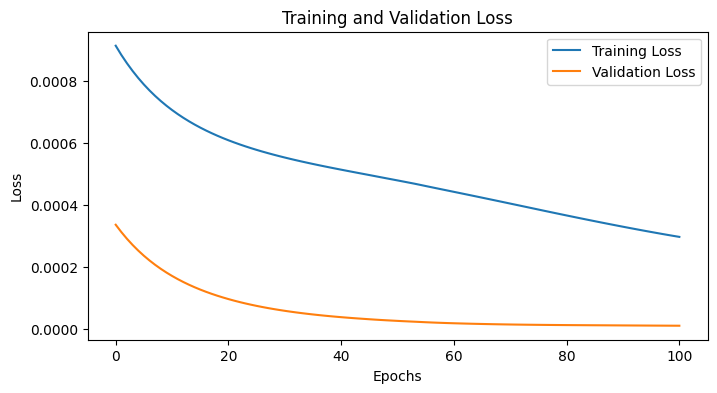

In [19]:
mlp.fit(x_train_scaled, y_train)
# Evaluate on validation set
val_score = mlp.score(x_val_scaled, y_val)

# Initialize lists to store loss
train_loss = []
val_loss = []

# Train the model
for epoch in range(mlp.max_iter+1):
    mlp.max_iter = epoch
    mlp.partial_fit(x_train_scaled, y_train, classes=np.unique(y_train))

    # Calculate training loss
    train_loss.append(mlp.loss_)

    # Calculate validation loss
    y_val_pred_proba = mlp.predict_proba(x_val_scaled)
    val_loss_epoch = -np.mean(np.log(y_val_pred_proba[np.arange(len(y_val)), y_val]))    # Using log loss (cross-entropy)
    val_loss.append(val_loss_epoch)

# Plot loss curves
plt.figure(figsize=(8, 4))
plt.plot(range(0, mlp.max_iter + 1), train_loss, label='Training Loss')
plt.plot(range(0, mlp.max_iter + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

*Now for the MLP model that we defined, we get the error for each Iteration (training loss) :*

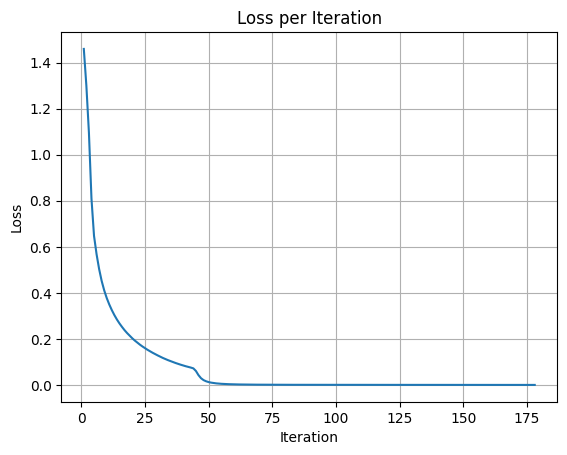

In [20]:
ِ
plt.plot(range(1, len(losses) + 1), losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss per Iteration')
plt.grid(True)
plt.show()

Iteration 1, loss = 0.55923150
Iteration 2, loss = 0.05484788
Iteration 3, loss = 0.01449225
Iteration 4, loss = 0.00746212
Iteration 5, loss = 0.00512018
Iteration 6, loss = 0.00432532
Iteration 7, loss = 0.00388551
Iteration 8, loss = 0.00368432
Iteration 9, loss = 0.00348291
Iteration 10, loss = 0.00337969
Iteration 11, loss = 0.00321030
Iteration 12, loss = 0.00309740
Iteration 13, loss = 0.00302085
Iteration 14, loss = 0.00281099
Iteration 15, loss = 0.00268724
Iteration 16, loss = 0.00257752
Iteration 17, loss = 0.00346446
Iteration 18, loss = 0.00246423
Iteration 19, loss = 0.00242665
Iteration 20, loss = 0.00239353
Iteration 21, loss = 0.00237215
Iteration 22, loss = 0.00233445
Iteration 23, loss = 0.00231902
Iteration 24, loss = 0.00228289
Iteration 25, loss = 0.00224475
Iteration 26, loss = 0.00220770
Iteration 27, loss = 0.00215629
Iteration 28, loss = 0.00215693
Iteration 29, loss = 0.00208216
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. S

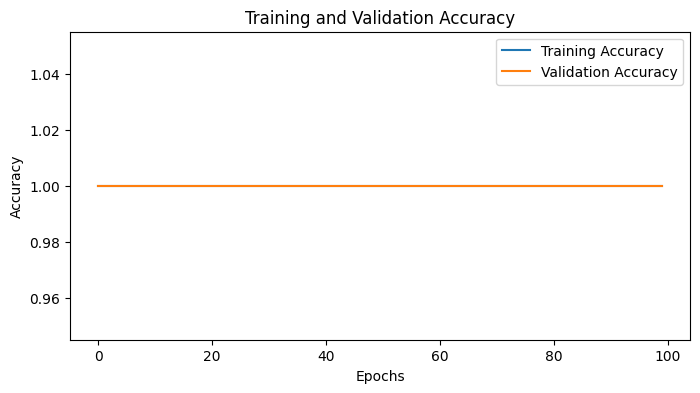

In [21]:
# Initialize lists to store accuracy
train_accuracy = []
val_accuracy = []

mlp = MLPClassifier(hidden_layer_sizes=(16, 10, 4), random_state=24, max_iter=100, solver='adam', activation='relu', tol=0.0001, learning_rate_init=0.001, verbose=True, batch_size=1)

mlp.fit(x_train_scaled, y_train)
# Evaluate on validation set
val_score = mlp.score(x_val_scaled, y_val)
val_score


# Train the model
for epoch in range(mlp.max_iter):
    mlp.max_iter = epoch
    mlp.partial_fit(x_train_scaled, y_train, classes=np.unique(y_train))

    # Calculate training accuracy
    train_accuracy.append(mlp.score(x_train_scaled, y_train))

    # Calculate validation accuracy
    val_accuracy.append(mlp.score(x_val_scaled, y_val))

# Plot accuracy curves
plt.figure(figsize=(8, 4))
plt.plot(range(0, mlp.max_iter + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(0, mlp.max_iter + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

*confusion matrix and classification_report :*

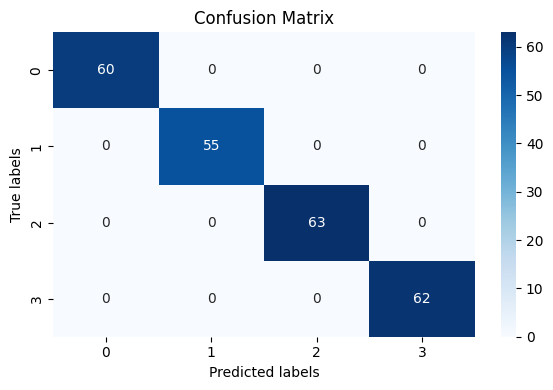

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63
           3       1.00      1.00      1.00        62

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = mlp.predict(x_test_scaled)

# Calculate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 10})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

***By changing the hyperparameters, we have:***

*** 1)activation='tanh', solver='sgd': ***

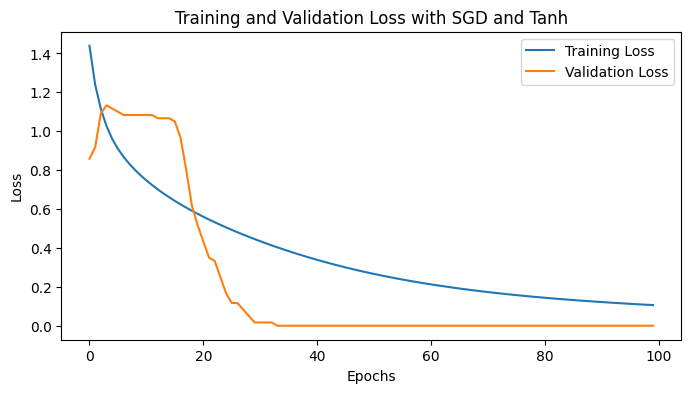

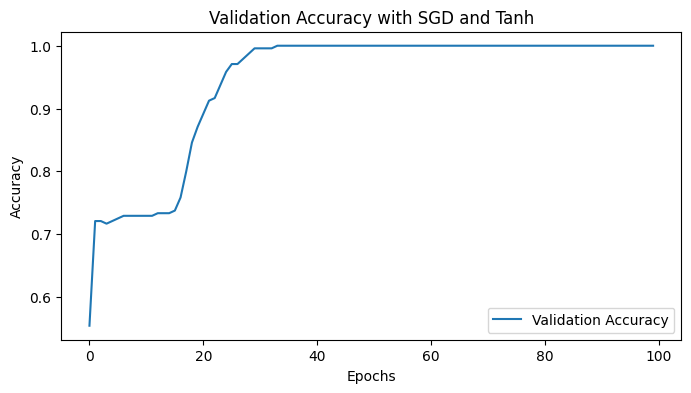

Classification Report for Test Data with SGD and Tanh:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63
           3       1.00      1.00      1.00        62

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240

Confusion Matrix for Test Data with SGD and Tanh:
[[60  0  0  0]
 [ 0 55  0  0]
 [ 0  0 63  0]
 [ 0  0  0 62]]


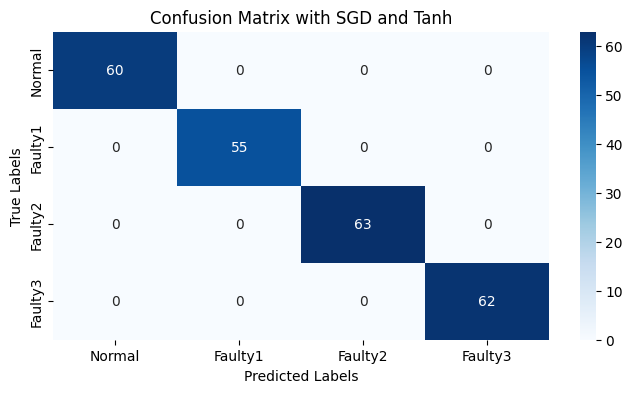

Final Train Accuracy with SGD and Tanh: 1.0
Final Validation Accuracy with SGD and Tanh: 1.0
Test Accuracy with SGD and Tanh: 1.0


In [36]:
# Create and train the MLP model manually with new optimizer and loss function
mlp_model = MLPClassifier(hidden_layer_sizes=(10,  10 , 4 ), activation='tanh', solver='sgd', learning_rate_init=0.01, max_iter=1, warm_start=True, random_state=24)

train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(100):  # Train for 100 epochs
    mlp_model.fit(x_train_scaled, y_train)
    train_losses.append(mlp_model.loss_)

    # Calculate validation loss and accuracy
    val_preds = mlp_model.predict(x_val_scaled)
    val_accuracy = accuracy_score(y_val, val_preds)
    val_loss = np.mean((val_preds - y_val) ** 2)

    val_accuracies.append(val_accuracy)
    val_losses.append(val_loss)

# Plotting training and validation loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss with SGD and Tanh')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting validation accuracy
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Validation Accuracy with SGD and Tanh')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Predictions on test set
test_preds = mlp_model.predict(x_test_scaled)

# Classification report
print("Classification Report for Test Data with SGD and Tanh:")
print(classification_report(y_test, test_preds))

# Confusion matrix
cm = confusion_matrix(y_test, test_preds)
print("Confusion Matrix for Test Data with SGD and Tanh:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Faulty1', 'Faulty2', 'Faulty3'], yticklabels=['Normal', 'Faulty1', 'Faulty2', 'Faulty3'])
plt.title('Confusion Matrix with SGD and Tanh')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Analysis
print("Final Train Accuracy with SGD and Tanh:", accuracy_score(y_train, mlp_model.predict(x_train_scaled)))
print("Final Validation Accuracy with SGD and Tanh:", accuracy_score(y_val, mlp_model.predict(x_val_scaled)))
print("Test Accuracy with SGD and Tanh:", accuracy_score(y_test, test_preds))

*** 2)Vactivation='tanh', solver='adam': ***

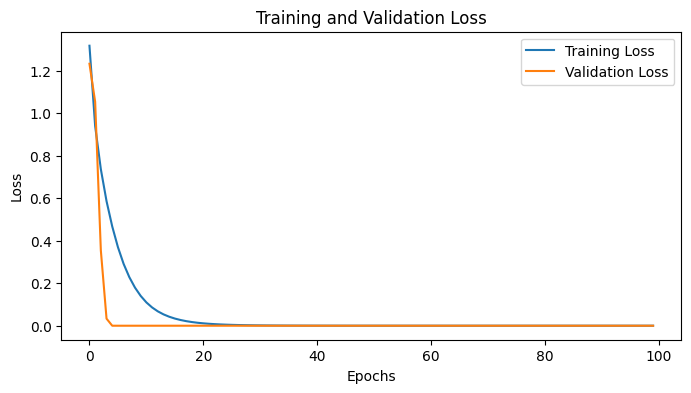

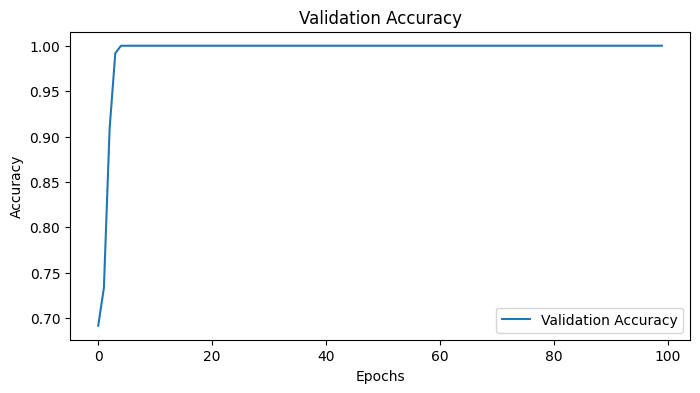

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63
           3       1.00      1.00      1.00        62

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240

Confusion Matrix for Test Data:
[[60  0  0  0]
 [ 0 55  0  0]
 [ 0  0 63  0]
 [ 0  0  0 62]]


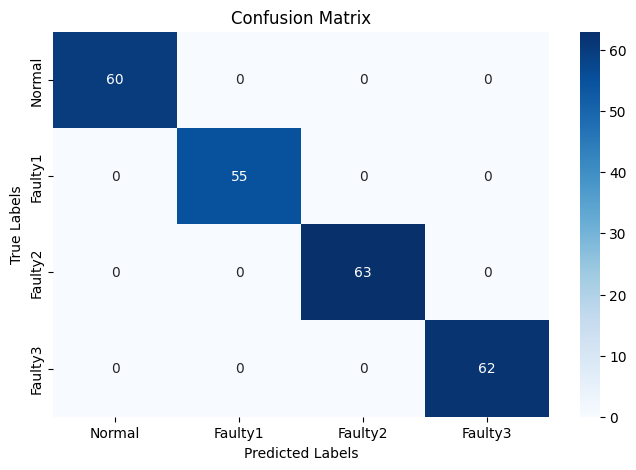

Final Train Accuracy: 1.0
Final Validation Accuracy: 1.0
Test Accuracy: 1.0


In [37]:
# Create and train the MLP model manually
mlp_model = MLPClassifier(hidden_layer_sizes=(10 , 10, 4), activation='tanh', solver='adam',learning_rate_init=0.01, max_iter=1, warm_start=True, random_state=24)

train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(100):  # Train for 100 epochs
    mlp_model.fit(x_train_scaled, y_train)
    train_losses.append(mlp_model.loss_)

    # Calculate validation loss and accuracy
    val_preds = mlp_model.predict(x_val_scaled)
    val_accuracy = accuracy_score(y_val, val_preds)
    val_loss = np.mean((val_preds - y_val) ** 2)

    val_accuracies.append(val_accuracy)
    val_losses.append(val_loss)

# Plotting training and validation loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting validation accuracy
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Predictions on test set
test_preds = mlp_model.predict(x_test_scaled)

# Classification report
print("Classification Report for Test Data:")
print(classification_report(y_test, test_preds))

# Confusion matrix
cm = confusion_matrix(y_test, test_preds)
print("Confusion Matrix for Test Data:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Faulty1', 'Faulty2', 'Faulty3'], yticklabels=['Normal', 'Faulty1', 'Faulty2', 'Faulty3'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Analysis
print("Final Train Accuracy:", accuracy_score(y_train, mlp_model.predict(x_train_scaled)))
print("Final Validation Accuracy:", accuracy_score(y_val, mlp_model.predict(x_val_scaled)))
print("Test Accuracy:", accuracy_score(y_test, test_preds))

###Method2

**Keras Sequential API:**

In [14]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

# Set the random seed for reproducibility
random.seed(24)
np.random.seed(24)
tf.random.set_seed(24)

model_k = Sequential([
    Dense(units=5, activation='relu'),
    Dense(units=4, activation='relu'),
    Dense(units=4, activation='softmax'),
])
model_k.compile(
    optimizer='adam',
    loss='SparseCategoricalCrossentropy',
    metrics=['accuracy']
    )

histories = model_k.fit(
    x= x_train_scaled,
    y= y_train,
    validation_data= (x_val_scaled, y_val),
    epochs=50,
    batch_size=1,
    verbose=2,
    )

Epoch 1/50
720/720 - 4s - loss: 0.9202 - accuracy: 0.6625 - val_loss: 0.6849 - val_accuracy: 0.7458 - 4s/epoch - 6ms/step
Epoch 2/50
720/720 - 2s - loss: 0.6412 - accuracy: 0.8069 - val_loss: 0.5244 - val_accuracy: 0.8500 - 2s/epoch - 3ms/step
Epoch 3/50
720/720 - 6s - loss: 0.4939 - accuracy: 0.8792 - val_loss: 0.3951 - val_accuracy: 0.9125 - 6s/epoch - 9ms/step
Epoch 4/50
720/720 - 3s - loss: 0.3661 - accuracy: 0.9597 - val_loss: 0.2769 - val_accuracy: 1.0000 - 3s/epoch - 4ms/step
Epoch 5/50
720/720 - 1s - loss: 0.2500 - accuracy: 0.9931 - val_loss: 0.1737 - val_accuracy: 1.0000 - 1s/epoch - 2ms/step
Epoch 6/50
720/720 - 1s - loss: 0.1379 - accuracy: 0.9972 - val_loss: 0.0495 - val_accuracy: 1.0000 - 1s/epoch - 2ms/step
Epoch 7/50
720/720 - 1s - loss: 0.0418 - accuracy: 1.0000 - val_loss: 0.0191 - val_accuracy: 1.0000 - 1s/epoch - 2ms/step
Epoch 8/50
720/720 - 1s - loss: 0.0236 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 1.0000 - 1s/epoch - 2ms/step
Epoch 9/50
720/720 - 1s 

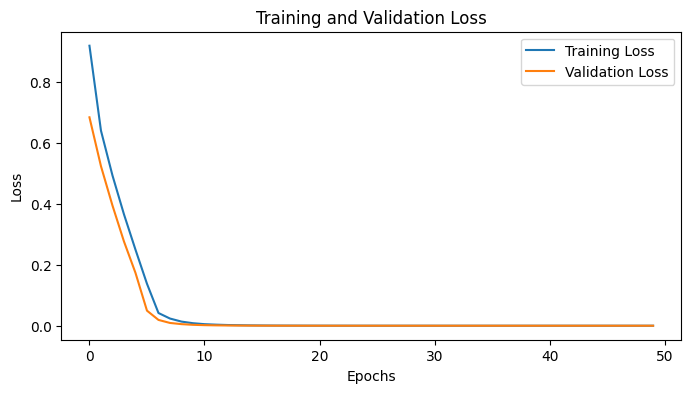

In [15]:
plt.rcParams["figure.figsize"] = (8, 4)
plt.plot(histories.history['loss'])   # Training loss
plt.plot(histories.history['val_loss'])  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Training and Validation Loss')
plt.show()

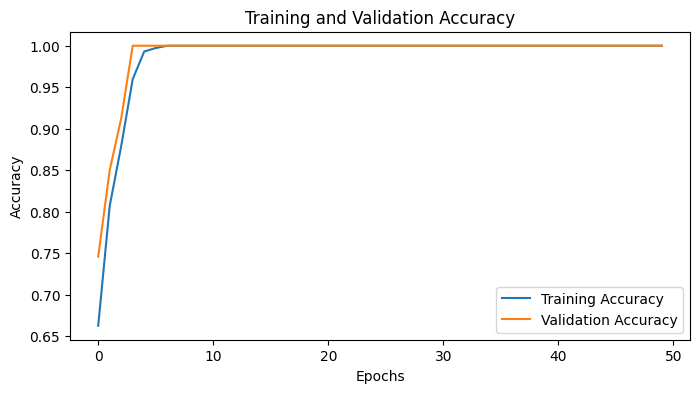

In [25]:
plt.plot(histories.history['accuracy'])             # Training accuracy
plt.plot(histories.history['val_accuracy'])         # Validation accuracy

plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Training and Validation Accuracy')
plt.show()

*confusion matrix and classification_report :*

8/8 [==============================] - 0s 6ms/step


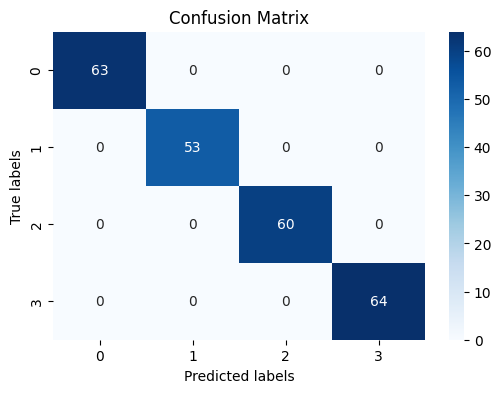

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        64

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



In [26]:
# Predict probabilities for each class
y_pred_probs = model_k.predict(x_val_scaled)

# Get predicted classes
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate confusion matrix
cf_matrix = confusion_matrix(y_val, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 10})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_val)), 0)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred))

##Part3

***It should be noted that due to the simplicity and more possibilities of method 2, method 2 is used in the rest of this question***

*In this part, we perform the process of the previous question with an optimizer and a new loss function (to compare the results)*

***The first mode***

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

model_k2 = Sequential([
    Dense(units=5, activation='relu'),
    Dense(units=4, activation='relu'),
    Dense(units=4, activation='softmax'),
])

model_k2.compile(
    optimizer= SGD(),
    loss= 'mse',
    metrics=['accuracy']
)

histories2 = model_k2.fit(
    x=x_train_scaled,
    y=y_train,
    validation_data=(x_val_scaled, y_val),
    epochs=50,
    batch_size=1,
    verbose=2,
)

Epoch 1/50
720/720 - 3s - loss: 2.7531 - accuracy: 0.4889 - val_loss: 2.9248 - val_accuracy: 0.4250 - 3s/epoch - 4ms/step
Epoch 2/50
720/720 - 1s - loss: 2.7470 - accuracy: 0.3847 - val_loss: 2.9237 - val_accuracy: 0.3917 - 1s/epoch - 2ms/step
Epoch 3/50
720/720 - 1s - loss: 2.7464 - accuracy: 0.4111 - val_loss: 2.9233 - val_accuracy: 0.4625 - 1s/epoch - 2ms/step
Epoch 4/50
720/720 - 1s - loss: 2.7461 - accuracy: 0.4597 - val_loss: 2.9231 - val_accuracy: 0.5167 - 1s/epoch - 2ms/step
Epoch 5/50
720/720 - 1s - loss: 2.7460 - accuracy: 0.4486 - val_loss: 2.9231 - val_accuracy: 0.5125 - 1s/epoch - 2ms/step
Epoch 6/50
720/720 - 1s - loss: 2.7459 - accuracy: 0.2875 - val_loss: 2.9230 - val_accuracy: 0.2833 - 1s/epoch - 2ms/step
Epoch 7/50
720/720 - 1s - loss: 2.7459 - accuracy: 0.2528 - val_loss: 2.9230 - val_accuracy: 0.2750 - 1s/epoch - 2ms/step
Epoch 8/50
720/720 - 1s - loss: 2.7459 - accuracy: 0.2472 - val_loss: 2.9230 - val_accuracy: 0.2625 - 1s/epoch - 2ms/step
Epoch 9/50
720/720 - 1s 

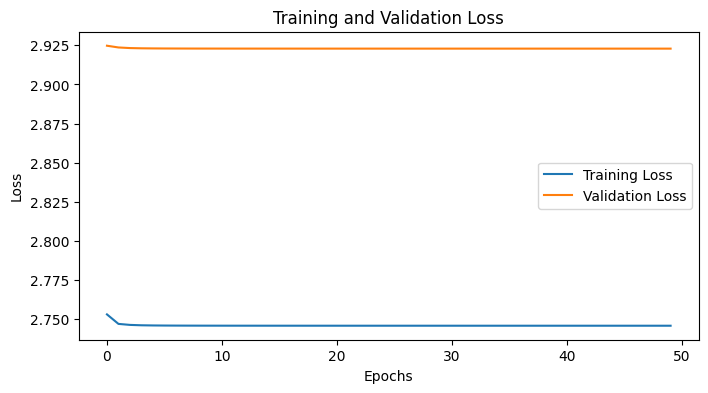

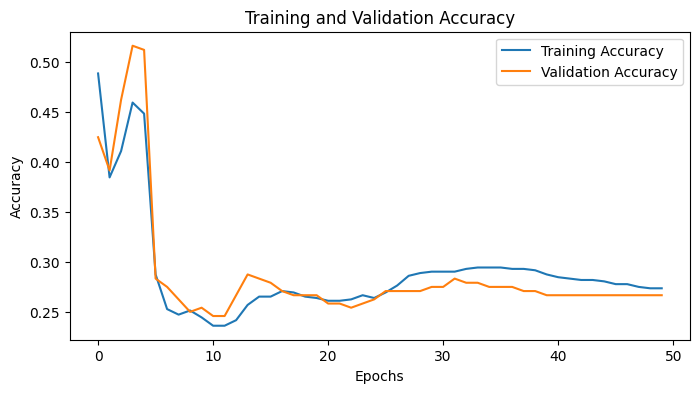

8/8 [==============================] - 0s 3ms/step


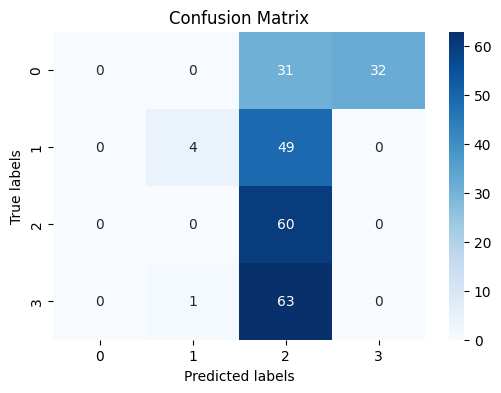

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.80      0.08      0.14        53
           2       0.30      1.00      0.46        60
           3       0.00      0.00      0.00        64

    accuracy                           0.27       240
   macro avg       0.27      0.27      0.15       240
weighted avg       0.25      0.27      0.14       240



In [20]:
#Training and Validation Loss
plt.rcParams["figure.figsize"] = (8, 4)
plt.plot(histories2.history['loss'])   # Training loss
plt.plot(histories2.history['val_loss'])  # Validation loss
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Training and Validation Loss')
plt.show()
#-----------------------------------------------------

#Training and Validation Accuracy
plt.plot(histories2.history['accuracy'])             # Training accuracy
plt.plot(histories2.history['val_accuracy'])         # Validation accuracy
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Training and Validation Accuracy')
plt.show()
#-----------------------------------------------------

#confusion matrix & classification report
# Predict probabilities for each class
y_pred_probs = model_k2.predict(x_val_scaled)

# Get predicted classes
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate confusion matrix
cf_matrix = confusion_matrix(y_val, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 10})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_val)), 0)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred))

***The second mode***

In [40]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

model_k3 = Sequential([
    Dense(units=5, activation='relu'),
    Dense(units=4, activation='relu'),
    Dense(units=4, activation='softmax'),
])

model_k3.compile(
    optimizer= RMSprop(),
    loss='categorical_hinge' ,
    metrics=['accuracy']
)

histories3 = model_k3.fit(
    x=x_train_scaled,
    y=y_train,
    validation_data=(x_val_scaled, y_val),
    epochs=50,
    batch_size=1,
    verbose=2,
)

Epoch 1/50
720/720 - 2s - loss: 0.3093 - accuracy: 0.5653 - val_loss: 0.3285 - val_accuracy: 0.4708 - 2s/epoch - 3ms/step
Epoch 2/50
720/720 - 1s - loss: 0.3074 - accuracy: 0.5708 - val_loss: 0.3282 - val_accuracy: 0.7333 - 1s/epoch - 2ms/step
Epoch 3/50
720/720 - 1s - loss: 0.3074 - accuracy: 0.5708 - val_loss: 0.3281 - val_accuracy: 0.7333 - 1s/epoch - 2ms/step
Epoch 4/50
720/720 - 1s - loss: 0.3074 - accuracy: 0.5708 - val_loss: 0.3282 - val_accuracy: 0.7333 - 1s/epoch - 2ms/step
Epoch 5/50
720/720 - 1s - loss: 0.3074 - accuracy: 0.5736 - val_loss: 0.3282 - val_accuracy: 0.4708 - 1s/epoch - 2ms/step
Epoch 6/50
720/720 - 1s - loss: 0.3074 - accuracy: 0.5722 - val_loss: 0.3282 - val_accuracy: 0.4708 - 1s/epoch - 2ms/step
Epoch 7/50
720/720 - 1s - loss: 0.3074 - accuracy: 0.5681 - val_loss: 0.3283 - val_accuracy: 0.7333 - 1s/epoch - 2ms/step
Epoch 8/50
720/720 - 2s - loss: 0.3074 - accuracy: 0.5722 - val_loss: 0.3282 - val_accuracy: 0.7333 - 2s/epoch - 3ms/step
Epoch 9/50
720/720 - 2s 

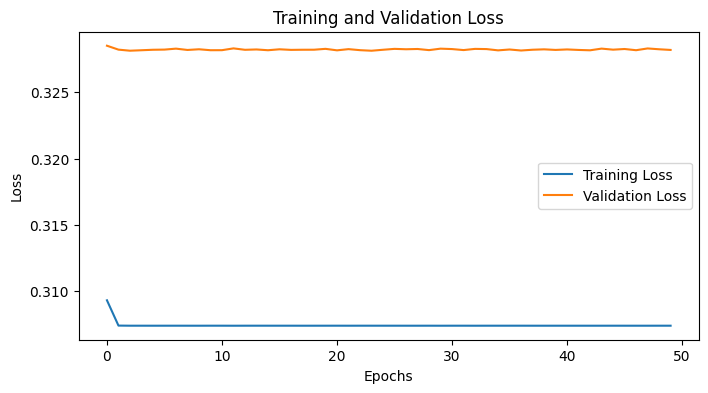

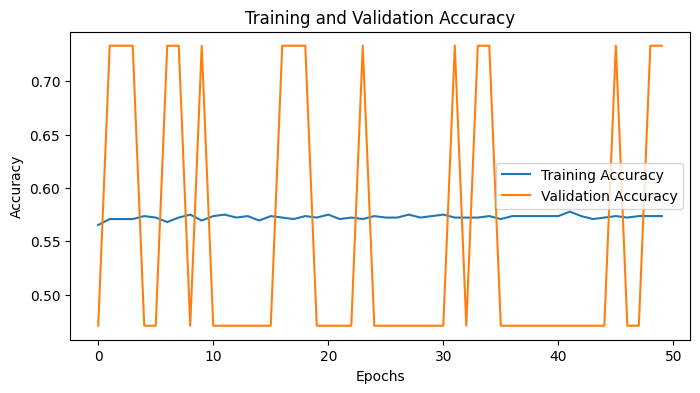

8/8 [==============================] - 0s 3ms/step


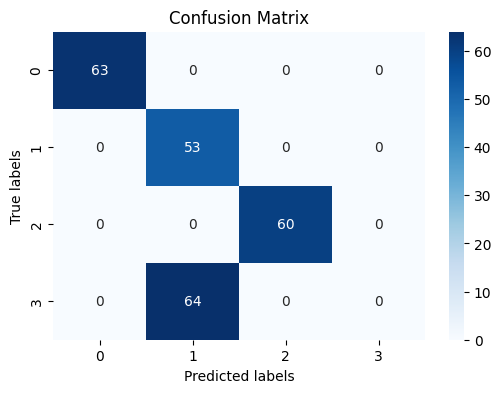

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       0.45      1.00      0.62        53
           2       1.00      1.00      1.00        60
           3       0.00      0.00      0.00        64

    accuracy                           0.73       240
   macro avg       0.61      0.75      0.66       240
weighted avg       0.61      0.73      0.65       240



In [41]:
#Training and Validation Loss
plt.rcParams["figure.figsize"] = (8, 4)
plt.plot(histories3.history['loss'])   # Training loss
plt.plot(histories3.history['val_loss'])  # Validation loss
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Training and Validation Loss')
plt.show()
#-----------------------------------------------------

#Training and Validation Accuracy
plt.plot(histories3.history['accuracy'])             # Training accuracy
plt.plot(histories3.history['val_accuracy'])         # Validation accuracy
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Training and Validation Accuracy')
plt.show()
#-----------------------------------------------------

#confusion matrix & classification report
# Predict probabilities for each class
y_pred_probs = model_k3.predict(x_val_scaled)

# Get predicted classes
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate confusion matrix
cf_matrix = confusion_matrix(y_val, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 10})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_val)), 0)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred))

*We can see that the performance of the network has become much worse!!*

##Part4

**use to K-Fold Cross-validation or Stratified K-Fold Cross-validation**

In [27]:
x= df.drop('label', axis=1).values  # Features
y= df['label'].values              # Labels
x_shuffled, y_shuffled = shuffle(x,y, random_state = 24)

In [ ]:
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Define a function to create and compile the model
def create_model():
    model = Sequential([
        Dense(units=5, activation='relu'),
        Dense(units=4, activation='relu'),
        Dense(units=4, activation='softmax')
    ])
    model.compile(
        optimizer=Adam(),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

kf = KFold(n_splits=10)

scores = []

for train_index, test_index in kf.split(x_shuffled):
    # Split data into training and testing sets
    x_train, x_test = x_shuffled[train_index], x_shuffled[test_index]
    y_train, y_test = y_shuffled[train_index], y_shuffled[test_index]

    # Further split training data into training and validation sets
    kf_inner = KFold(n_splits=5)
    inner_scores = []
    for train_inner_index, val_index in kf_inner.split(x_train):
        x_train_fold, x_val_fold = x_train[train_inner_index], x_train[val_index]
        y_train_fold, y_val_fold = y_train[train_inner_index], y_train[val_index]

        # Create model
        model = create_model()

        # Fit model with validation data
        history = model.fit(
            x_train_fold, y_train_fold,
            validation_data=(x_val_fold, y_val_fold),
            epochs=50,
            batch_size=1,
            verbose=0
        )

        # Evaluate model on validation set
        _, accuracy = model.evaluate(x_val_fold, y_val_fold, verbose=0)
        inner_scores.append(accuracy)

    # Average validation accuracy
    avg_val_accuracy = sum(inner_scores) / len(inner_scores)

    # Create model using the entire training data
    model = create_model()

    # Fit model using entire training data
    model.fit(x_train, y_train, epochs=50, batch_size=1, verbose=0)

    # Evaluate model on test set
    _, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

    # Append test accuracy to scores list
    scores.append(test_accuracy)

# Print average test accuracy
print("Average test accuracy:", sum(scores) / len(scores))

Average test accuracy: 0.9366666674613953


**another method:**

In [25]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score                   # Or other desired metric
kf = KFold(n_splits=30, shuffle=True, random_state=24)       # Adjust parameters as needed

model_3 = Sequential([
    Dense(units = 5, activation='relu'),
    Dense(units = 4, activation='relu'),
    Dense(units = 4, activation='softmax'),
    ])

model_3.compile(
    optimizer='Adam',
    loss='SparseCategoricalCrossentropy',
    metrics=['accuracy']
    )

In [28]:
total_accuracy = 0

for train_index, test_index in kf.split(x_shuffled):
    X_train, X_test = x_shuffled[train_index], x_shuffled[test_index]
    Y_train, Y_test =y_shuffled[train_index], y_shuffled[test_index]

    model_3.fit(X_train, Y_train)
    Y_pred = model_3.predict(X_test)
    accuracy = accuracy_score(Y_test, np.argmax(Y_pred , axis = 1 ))
    total_accuracy += accuracy
    print(f"Fold Accuracy: {accuracy:.4f}")

average_accuracy = total_accuracy / kf.n_splits
print(f"Average Accuracy: {average_accuracy:.4f}")

2/2 [==============================] - 0s 7ms/step
Fold Accuracy: 0.2250
2/2 [==============================] - 0s 4ms/step
Fold Accuracy: 0.3750
2/2 [==============================] - 0s 5ms/step
Fold Accuracy: 0.1000
2/2 [==============================] - 0s 9ms/step
Fold Accuracy: 0.5000
2/2 [==============================] - 0s 5ms/step
Fold Accuracy: 0.6250
2/2 [==============================] - 0s 11ms/step
Fold Accuracy: 0.6250
2/2 [==============================] - 0s 10ms/step
Fold Accuracy: 0.6750
2/2 [==============================] - 0s 7ms/step
Fold Accuracy: 0.5750
2/2 [==============================] - 0s 14ms/step
Fold Accuracy: 0.6750
2/2 [==============================] - 0s 5ms/step
Fold Accuracy: 0.6500
2/2 [==============================] - 0s 8ms/step
Fold Accuracy: 0.4750
2/2 [==============================] - 0s 11ms/step
Fold Accuracy: 0.5500
2/2 [==============================] - 0s 10ms/step
Fold Accuracy: 0.7000
2/2 [==============================] - 0s 11ms

**MLPClassifier**

Average Validation Accuracy: 1.0
Average Validation Loss: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.14      0.18       300
           1       0.29      0.39      0.33       300
           2       0.31      0.45      0.37       300
           3       0.28      0.21      0.24       300

    accuracy                           0.30      1200
   macro avg       0.29      0.30      0.28      1200
weighted avg       0.29      0.30      0.28      1200

Confusion Matrix:
[[ 41  98 106  55]
 [ 37 116  90  57]
 [ 27  88 136  49]
 [ 42  93 102  63]]


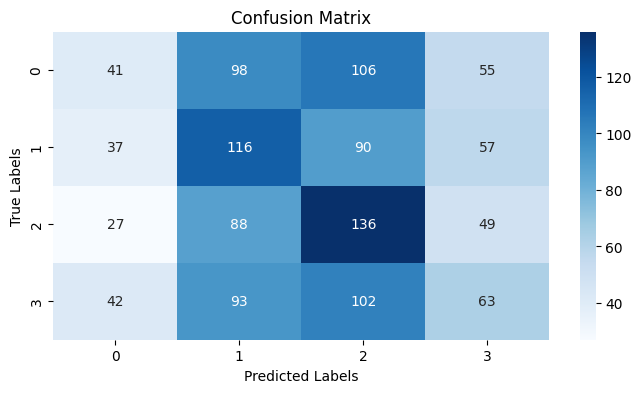

Final Model Accuracy: 0.2966666666666667


In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from scipy import stats
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
import seaborn as sns

x= df.drop('label', axis=1).values  # Features
y= df['label'].values              # Labels
x_shuffled, y_shuffled = shuffle(x,y, random_state = 24)

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_shuffled)

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5)
val_accuracies = []
val_losses = []

for train_index, val_index in skf.split(X_scaled, y_shuffled):
    x_train, x_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y_shuffled[train_index], y_shuffled[val_index]

    mlp_model = MLPClassifier(hidden_layer_sizes=(10 , 10 , 4), activation='tanh', solver='adam', learning_rate_init=0.01, max_iter=50, random_state=24)
    mlp_model.fit(x_train, y_train)

    val_preds = mlp_model.predict(x_val)
    val_accuracy = accuracy_score(y_val, val_preds)
    val_loss = np.mean((val_preds - y_val) ** 2)

    val_accuracies.append(val_accuracy)
    val_losses.append(val_loss)

# Report average accuracy and loss
print("Average Validation Accuracy:", np.mean(val_accuracies))
print("Average Validation Loss:", np.mean(val_losses))

# Final training on entire dataset
mlp_model_final = MLPClassifier(hidden_layer_sizes=(10 , 10 , 4), activation='tanh', solver='adam', learning_rate_init=0.01, max_iter=50, random_state=24)
mlp_model_final.fit(X_scaled, y)

# Predictions on the whole dataset
final_preds = mlp_model_final.predict(X_scaled)

# Classification report
print("Classification Report:")
print(classification_report(y, final_preds))

# Confusion matrix
cm = confusion_matrix(y, final_preds)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Analysis
print("Final Model Accuracy:", accuracy_score(y, final_preds))

#Question3

*import Required libraries and dataset*

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import cm
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

#dataset
from sklearn.datasets import fetch_covtype

In [96]:
#download data
dataset = fetch_covtype()
dataset

{'data': array([[2.596e+03, 5.100e+01, 3.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.590e+03, 5.600e+01, 2.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.804e+03, 1.390e+02, 9.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [2.386e+03, 1.590e+02, 1.700e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.384e+03, 1.700e+02, 1.500e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.383e+03, 1.650e+02, 1.300e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00]]),
 'target': array([5, 5, 2, ..., 3, 3, 3], dtype=int32),
 'frame': None,
 'target_names': ['Cover_Type'],
 'feature_names': ['Elevation',
  'Aspect',
  'Slope',
  'Horizontal_Distance_To_Hydrology',
  'Vertical_Distance_To_Hydrology',
  'Horizontal_Distance_To_Roadways',
  'Hillshade_9am',
  'Hillshade_Noon',
  'Hillshade_3pm',
  'Horizontal_Distance_To_Fire_Points',
  'Wilderness_Area_0',
  'Wilderness_Area_1',
  'Wilderness_Area_2',

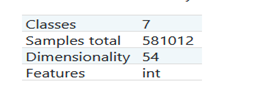

In [100]:
# Selecting needed elements
X = dataset['data']
y = dataset['target']
features = dataset['feature_names']

# pandas dataframe
df = pd.DataFrame(X, columns=features)
df['Target'] = y

print(f'The dataframe shape is {df.shape}')

The dataframe shape is (581012, 55)


**We have 7 classes and it is necessary to see the distribution of data in each class:**

Text(0.5, 0, 'Classes')

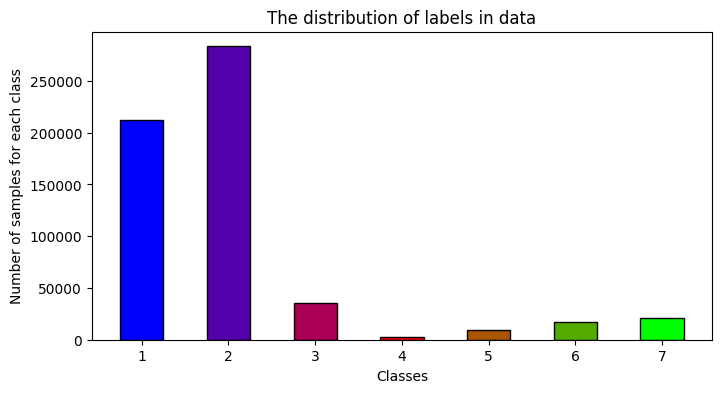

In [101]:
hist, bins = np.histogram(y,bins=7)
cmap = cm.get_cmap('brg')

bins = np.unique(y) # For the bins to come
plt.bar(bins, hist, width=0.5,edgecolor='black',color=cmap(np.linspace(0, 1, len(hist))));
plt.xticks(range(1,8), range(1,8));
plt.title('The distribution of labels in data')
plt.ylabel('Number of samples for each class')
plt.xlabel('Classes')

*Balancing the dataset*

In [76]:
sampler = RandomUnderSampler(random_state=24)

x_resampled, y_resampled = sampler.fit_resample(X, y)

Text(0.5, 0, 'Classes')

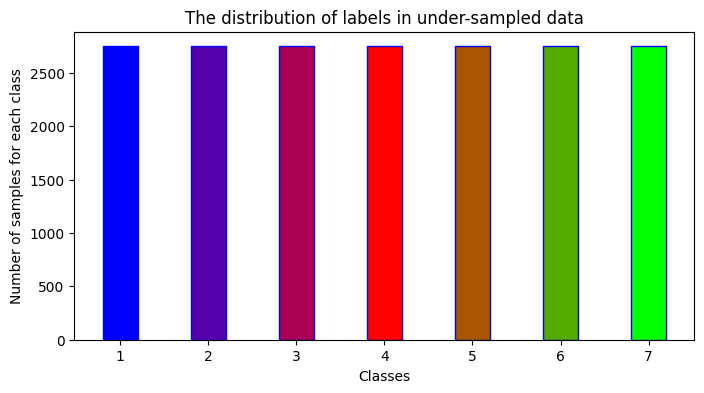

In [102]:
hist, bins = np.histogram(y_resampled,bins=7)
cmap = cm.get_cmap('brg');

bins = np.unique(y_resampled) # For the bins to come
plt.bar(bins, hist, width=0.4 ,edgecolor='blue',color=cmap(np.linspace(0, 1, len(hist))));
plt.xticks(range(1,8), range(1,8));
plt.title('The distribution of labels in under-sampled data')
plt.ylabel('Number of samples for each class')
plt.xlabel('Classes')

##Part1

**Split data**

In [104]:
# Split resmapled data
x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(
    x_resampled,
    y_resampled,
    random_state = 24,
    test_size = 0.15,
    shuffle = True
)

# Split main data
x_train, x_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state = 24,
    test_size = 0.15,
    shuffle = True
)

In [105]:
# scaler
scaler = StandardScaler()
scaler.fit(x_train)
# scaling datasets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

***To have the best model, we use 5 different modes and compare their performance:***

In [106]:
dt = DecisionTreeClassifier(random_state=24)
dt1 = clone(dt)
dt3 = clone(dt)
dt2 = clone(dt)

In [109]:
# With under-sampled data
dt.fit(x_train_r, y_train_r)
print(f'Model score for under-sampled data is: {dt.score(x_test_r, y_test_r):0.4f}', end='\n\n')

# With normal data
dt1.fit(x_train, y_train)
print(f'Model score for normal data is: {dt1.score(x_test, y_test):0.4f}', end='\n\n')

# With Weighted classes
weight = [
    len(y)/len(y[y==1]),
    len(y)/len(y[y==2]),
    len(y)/len(y[y==3]),
    len(y)/len(y[y==4]),
    len(y)/len(y[y==5]),
    len(y)/len(y[y==6]),
    len(y)/len(y[y==7])
]
w_train = [weight[a-1] for a in y_train]
w_test = [weight[a-1] for a in y_test]
dt2.fit(x_train, y_train, w_train)
print(f"The weight for each class is : {np.round(weight).astype('int16')}")
print(f'Model score for weighted data is: {dt2.score(x_test,y_test,w_test):0.4f}', end='\n\n')

# With K-fold method
kfold_score = cross_val_score(dt, X, y, cv=5)
print(f'Model score for 5-fold CV is : {np.mean(kfold_score):.4f} --> (mean value)', end='\n\n')

# Stratified K-fold model
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)
fold_acc = {'train':[], 'val':[]}
fold_hat = {'train':[], 'val':[]}
fold_ground = {'train':[], 'val':[]}
fold_input = {'train':[], 'val':[]}
all_models = []

# Train model
for train_index, val_index in kf.split(x_train,y_train):

    X_train_fold, X_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    fold_input['train'].append(X_train_fold)
    fold_input['val'].append(X_val_fold)
    fold_ground['train'].append(y_train_fold)
    fold_ground['val'].append(y_val_fold)

    # Train selected folds
    model = clone(dt3)
    model.fit(X_train_fold,y_train_fold)

    # Accuracy
    train_hat = model.predict(X_train_fold)
    fold_hat['train'].append(train_hat)
    train_hat = train_hat == y_train_fold
    train_score = np.sum(train_hat.astype('float64'))/len(y_train_fold)
    fold_acc['train'].append(train_score)

    val_hat = model.predict(X_val_fold)
    fold_hat['val'].append(val_hat)
    val_hat = val_hat == y_val_fold
    val_score = np.sum(val_hat.astype('float64'))/len(y_val_fold)
    fold_acc['val'].append(val_score)

    # Saving all models
    all_models.append(model)

skf_score = np.mean(fold_acc['val'])
print(f'Model score for Stratified 5-fold CV is {skf_score:0.4f} --> (mean value)')

Model score for under-sampled data is: 0.8017

Model score for normal data is: 0.9406

The weight for each class is : [  3   2  16 212  61  33  28]
Model score for weighted data is: 0.8918

Model score for 5-fold CV is : 0.5584 --> (mean value)

Model score for Stratified 5-fold CV is 0.9348 --> (mean value)


***So we saw that the performance of the model in the second state, that is, the state in which the data training was done without any additional work and operations, is the best state(dt1)***

In [111]:
tree_ob = dt1.tree_

# max depth
md = tree_ob.max_depth
print(f'Max depth of the tree is {md}', end='\n\n')

# number of samples in the leaves
ns = tree_ob.n_node_samples[-1]
print(f'There are {ns} number of samples at leaves', end='\n\n')

# Impurity at leaves
i_in_leaf = tree_ob.impurity[-1]
print(f'Impurity at leaves is {i_in_leaf}')

Max depth of the tree is 41

There are 1 number of samples at leaves

Impurity at leaves is 0.0


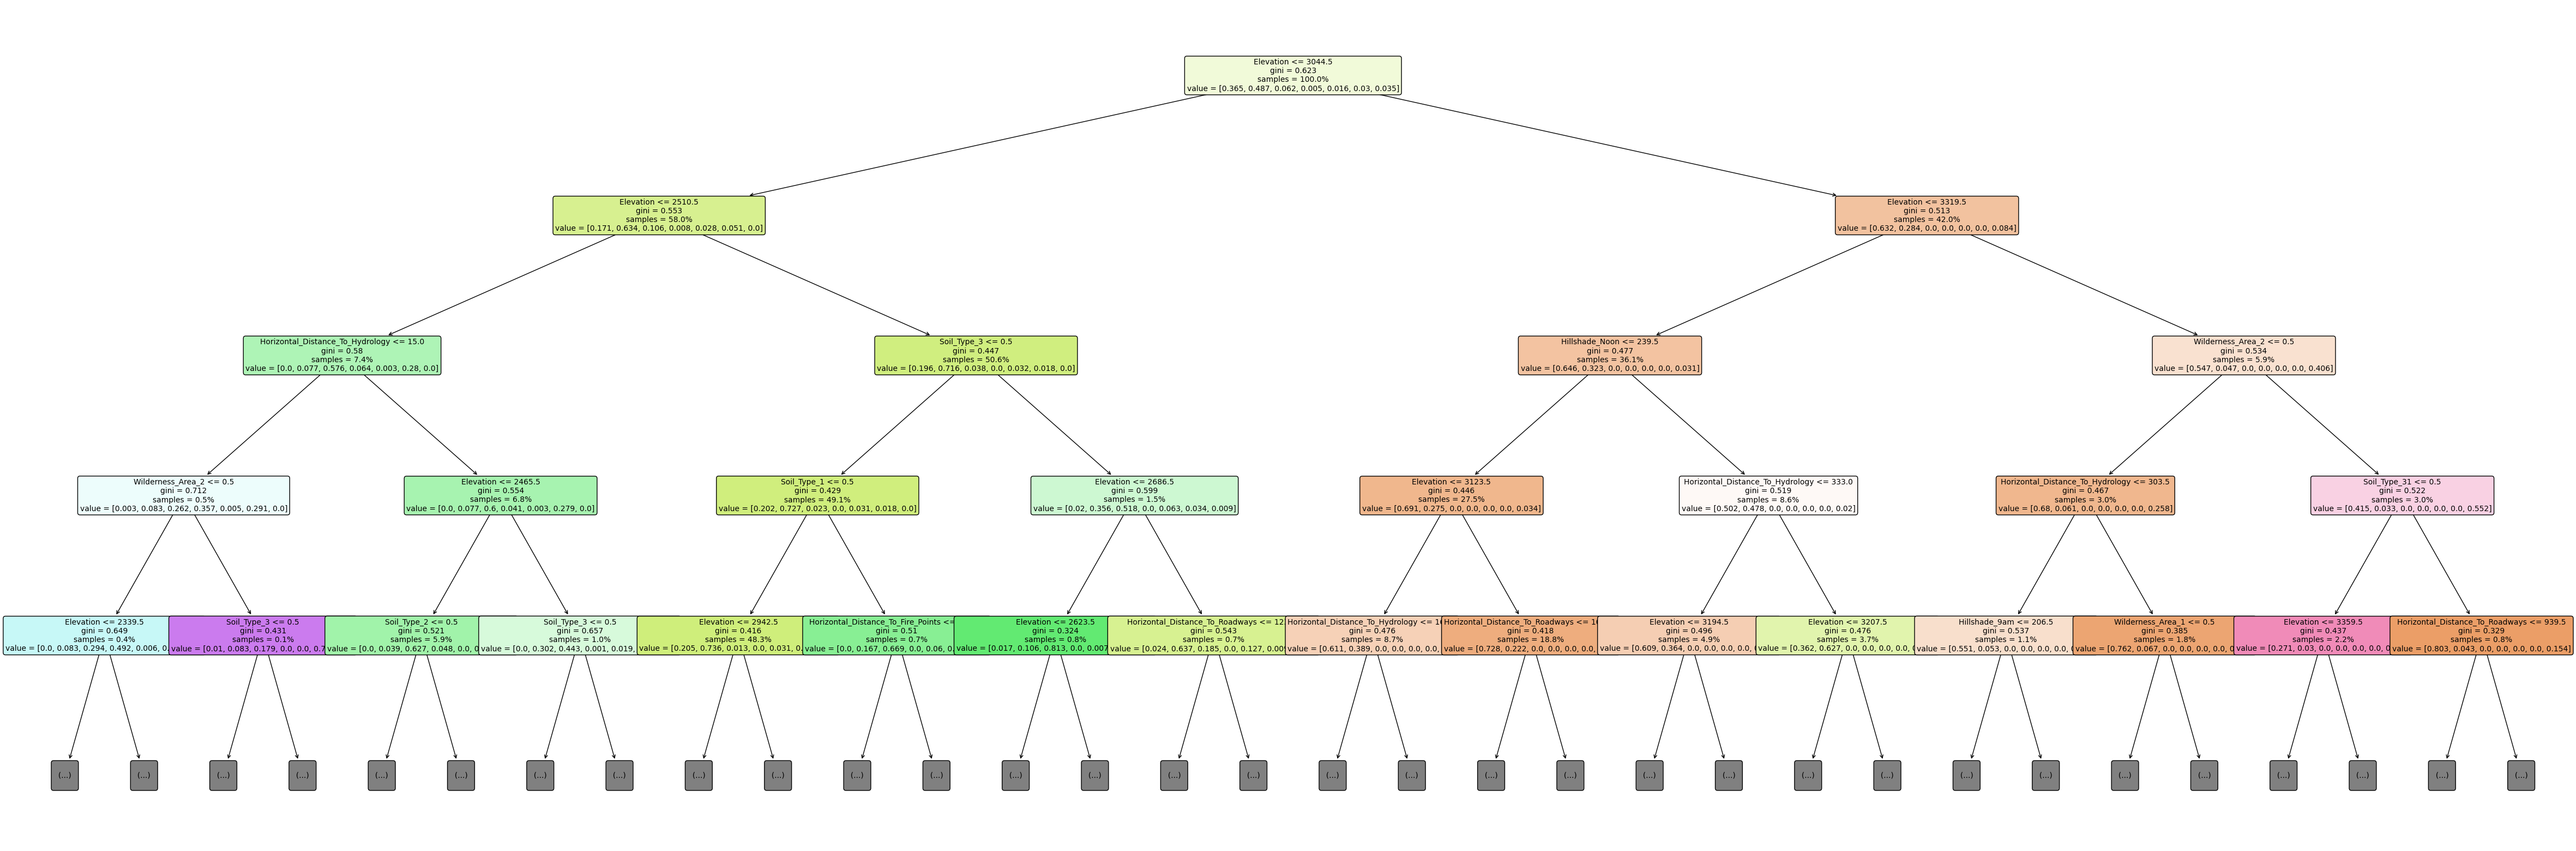

In [112]:
plt.figure(figsize=(60,20))
plot_tree(dt1, max_depth=4, filled=True , fontsize=10,feature_names=features, rounded=True, proportion=True)

[Text(0.6100974730471681, 0.9880952380952381, 'Elevation <= 3044.5\ngini = 0.623\nsamples = 493860\nvalue = [180087, 240676, 30426, 2339, 8111, 14734, 17487]\nclass = 2'),
 Text(0.3072666029421924, 0.9642857142857143, 'Elevation <= 2510.5\ngini = 0.553\nsamples = 286428\nvalue = [49031, 181717, 30426, 2339, 8111, 14734, 70]\nclass = 2'),
 Text(0.04745345425296121, 0.9404761904761905, 'Horizontal_Distance_To_Hydrology <= 15.0\ngini = 0.58\nsamples = 36412\nvalue = [8, 2809, 20961, 2336, 106, 10192, 0]\nclass = 3'),
 Text(0.011175658513013956, 0.9166666666666666, 'Wilderness_Area_2 <= 0.5\ngini = 0.712\nsamples = 2657\nvalue = [7, 221, 696, 948, 12, 773, 0]\nclass = 4'),
 Text(0.007753495441261215, 0.8928571428571429, 'Elevation <= 2339.5\ngini = 0.649\nsamples = 1925\nvalue = [0, 160, 565, 948, 12, 240, 0]\nclass = 4'),
 Text(0.0034920705025300466, 0.8690476190476191, 'Hillshade_9am <= 194.5\ngini = 0.54\nsamples = 1425\nvalue = [0, 7, 441, 850, 0, 127, 0]\nclass = 4'),
 Text(0.00177775

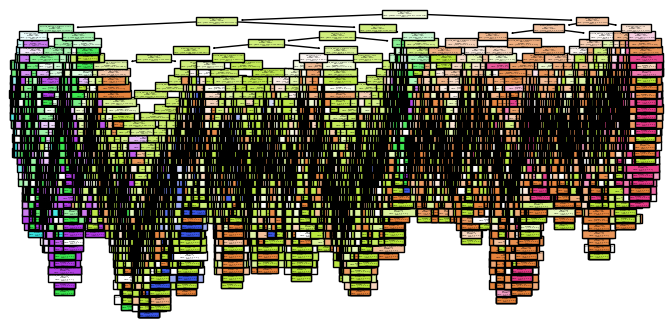

In [127]:
plot_tree(dt1, filled=True, feature_names=dataset.feature_names, class_names=[str(i) for i in np.unique(y)])

##Part2

**Confucsion matrix**

Text(0.5, 1.0, 'Confusion Matrix for Test data')

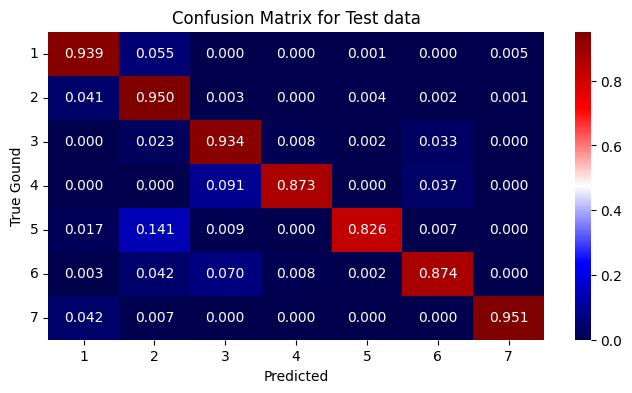

In [114]:
# Calclating Confucsion matrix
hat = dt1.predict(x_test)
cm_1 = confusion_matrix(y_test, hat)
cm_sum = np.sum(cm_1,axis=1).reshape(-1,1)
#normalize
cm = cm_1/cm_sum

# Plotting confusion matrix
sns.heatmap(cm, annot=True, cmap='seismic', fmt='.3f');
plt.xticks(np.array(range(0,7)).astype('float32')+0.5, range(1,8));
plt.yticks(np.array(range(0,7)).astype('float32')+0.5, range(1,8), rotation=0);
plt.xlabel('Predicted')
plt.ylabel('True Gound')
plt.title('Confusion Matrix for Test data')

**Calculation of model performance**

In [92]:
# Calculate overall accuracy
overall_accuracy = np.trace(cm) / float(np.sum(cm))

# Calculate precision, recall, and F1-score for each class
class_metrics = classification_report(y_test, hat, output_dict=True)

# Loop to calculate and print metrics
m_dic = {'class':[], 'precision':[],  'recall':[],  'f1_score':[]}
for c in np.unique(y_test):

    class_d = class_metrics[str(c)]
    per = class_d['precision']
    f1 = class_d['f1-score']
    rec = class_d["recall"]

    m_dic['class'].append(str(c))
    m_dic['precision'].append(np.round(per,4))
    m_dic['recall'].append(np.round(rec,4))
    m_dic['f1_score'].append(np.round(f1,4))

# Creating a DataFrame for metrics
mdf = pd.DataFrame(m_dic)
mdf.head(7)

,class,precision,recall,f1_score
0,1,0.9411,0.9412,0.9412
1,2,0.9509,0.9503,0.9506
2,3,0.9365,0.9374,0.9369
3,4,0.8478,0.8499,0.8489
4,5,0.8351,0.8605,0.8476
5,6,0.8903,0.8861,0.8882
6,7,0.9502,0.9453,0.9477


**Checking hyperparameters**

In [115]:
main_model = DecisionTreeClassifier(max_depth=20, min_samples_split=20, min_samples_leaf=20, max_features=20, random_state=24)

import tqdm
# Max depth
acc_md = []
hyper_md = np.arange(1,50,1)
pbar = tqdm.tqdm(hyper_md)
for i in pbar:
    test_model_md  = clone(main_model)
    test_model_md.max_depth = i
    test_model_md.fit(x_train_scaled, y_train)
    score = test_model_md.score(x_test_scaled, y_test)
    acc_md.append(score)

# Mininum sapmles split
acc_mss = []
hyper_mss = np.arange(1500,50,-10)
pbar = tqdm.tqdm(hyper_mss)
for i in pbar:
    test_model_mss = clone(main_model)
    test_model_mss.min_samples_split = i
    test_model_mss.fit(x_train_scaled, y_train)
    score = test_model_mss.score(x_test_scaled, y_test)
    acc_mss.append(score)

# Minimum samples leaf
acc_msl = []
hyper_msl = np.arange(1000,10,-5)
pbar = tqdm.tqdm(hyper_msl)
for i in pbar:
    test_model_msl = clone(main_model)
    test_model_msl.min_samples_leaf = i
    test_model_msl.fit(x_train_scaled, y_train)
    score = test_model_msl.score(x_test_scaled, y_test)
    acc_msl.append(score)

100%|██████████| 198/198 [12:50<00:00,  3.89s/it]


100%|██████████| 49/49 [04:40<00:00,  5.73s/it]


Text(0.5, 0, 'Max Features')

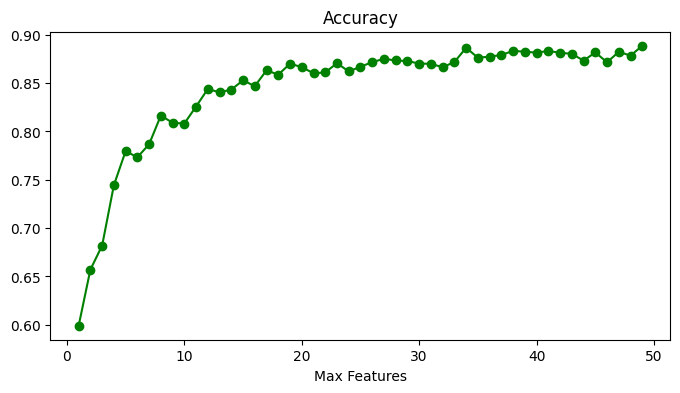

In [116]:
main_model = DecisionTreeClassifier(max_depth=20, min_samples_split=20, min_samples_leaf=20, max_features=20, random_state=24)
# Maximum features
acc_mf = []
hyper_mf = np.arange(1,50,1)
pbar = tqdm.tqdm(hyper_mf)
for i in pbar:
    test_model_mf = clone(main_model)
    test_model_mf.max_features = i
    test_model_mf.fit(x_train_scaled, y_train)
    score = test_model_mf.score(x_test_scaled, y_test)
    acc_mf.append(score)

# Min features
plt.figure()
plt.plot(hyper_mf, acc_mf, '-og')
plt.title('Accuracy')
plt.xlabel('Max Features')


Text(0.5, 0, 'Max Features')

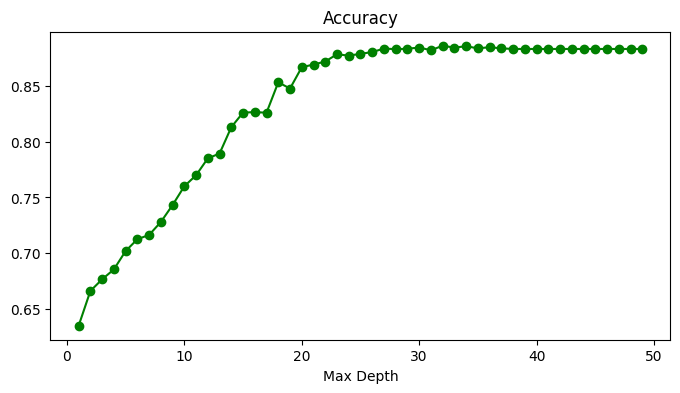

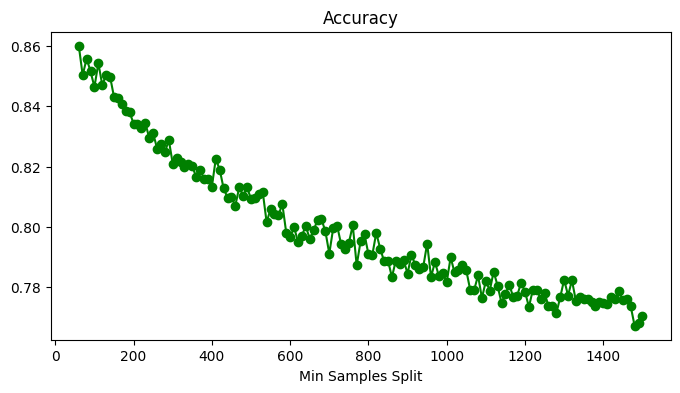

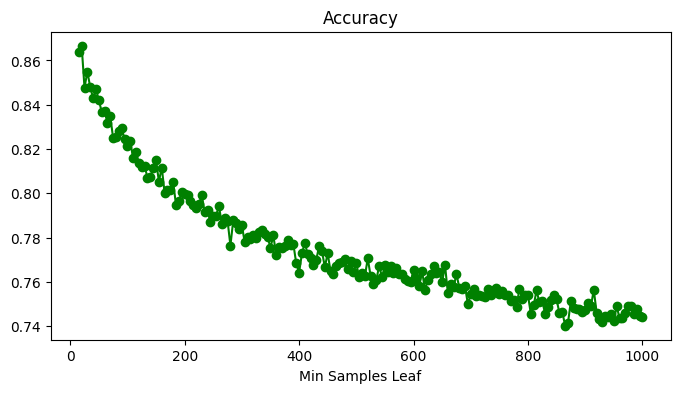

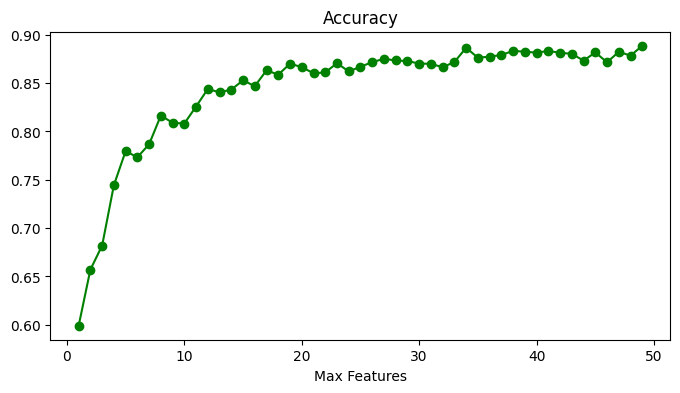

In [117]:
# max depth
plt.figure()
plt.plot(hyper_md, acc_md, '-og')
plt.title('Accuracy')
plt.xlabel('Max Depth')

# min samples split
plt.figure()
plt.plot(hyper_mss, acc_mss, '-og')
plt.title('Accuracy')
plt.xlabel('Min Samples Split')

# min samples leaf
plt.figure()
plt.plot(hyper_msl, acc_msl, '-og')
plt.title('Accuracy')
plt.xlabel('Min Samples Leaf')

# Min features
plt.figure()
plt.plot(hyper_mf, acc_mf, '-og')
plt.title('Accuracy')
plt.xlabel('Max Features')

**Choosing the best hyperparameters:**

In [118]:
main_model = DecisionTreeClassifier(max_depth=20, min_samples_split=20, min_samples_leaf=20, max_features=20, random_state=24)
grid_model = clone(main_model)

grid_param = {
    'max_depth': np.arange(30,42,3),
    'min_samples_leaf': np.arange(2,50,10),
    'max_features': np.arange(40,50,5)
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(grid_model, grid_param, cv=3, scoring='accuracy', verbose=1)

grid_search.fit(x_train_scaled, y_train)

print(f'The best score on Test data is :{grid_search.score(x_test_scaled,y_test):.4f}')
print(f'The best parameters are :{grid_search.best_params_}')

Fitting 3 folds for each of 40 candidates, totalling 120 fits
The best score on Test data is :0.9246
The best parameters are :{'max_depth': 30, 'max_features': 45, 'min_samples_leaf': 2}


##Part3

***Random forest model***

In [121]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=30)
rf.fit(x_train_scaled, y_train)

RandomForestClassifier(max_depth=30)

In [122]:
test_score = rf.score(x_test_scaled, y_test)
print(f'The score of random forest model on test data is {test_score:.4f}', end='\n\n')

print('Classification report for the random forest model is')
hattt = rf.predict(x_test_scaled)
cr = classification_report(y_test, hattt)
print(cr)

The score of random forest model on test data is 0.9469

Classification report for the random forest model is
              precision    recall  f1-score   support

           1       0.96      0.92      0.94     31753
           2       0.94      0.97      0.95     42625
           3       0.95      0.96      0.95      5328
           4       0.91      0.86      0.88       408
           5       0.96      0.72      0.82      1382
           6       0.92      0.90      0.91      2633
           7       0.97      0.94      0.96      3023

    accuracy                           0.95     87152
   macro avg       0.94      0.90      0.92     87152
weighted avg       0.95      0.95      0.95     87152



#Question 4


In [ ]:
!pip install --upgrade --no-cach-dir gdown
! gdown 1oV8j0E0MjZ92oeITtIbJjOF8WvDsn_5J


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --no-cach-dir
Downloading...
From: https://drive.google.com/uc?id=1oV8j0E0MjZ92oeITtIbJjOF8WvDsn_5J
To: /content/heart.csv
100% 38.1k/38.1k [00:00<00:00, 22.3MB/s]


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/MachineLearning/HW2/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Separate features and target
X = df.drop(columns=['target'])
y = df['target']

Number of data for each class:

In [ ]:
number_of_ones = y.sum()
print(f'Number of class one data: {number_of_ones}')
print(f'Number of class zeros data: {len(y) - number_of_ones}')

Number of class one data: 526
Number of class zeros data: 499


***measure the correlation of each feature with the label***

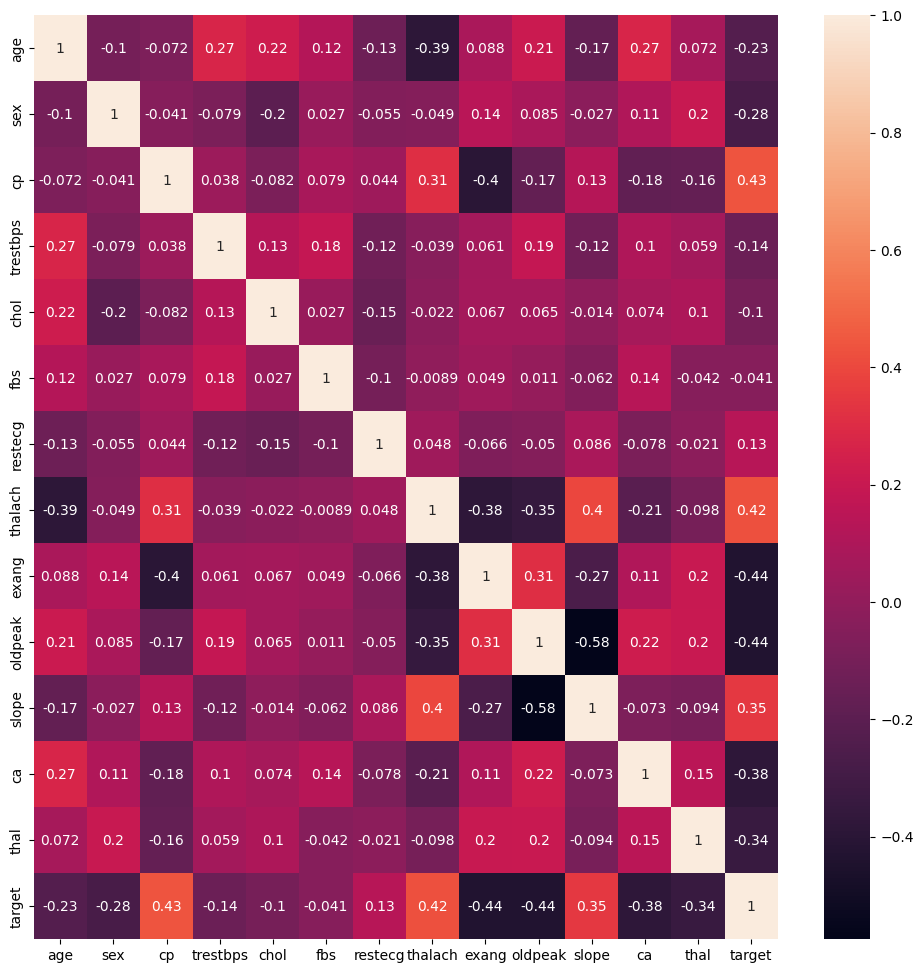

In [ ]:
plt.rcParams["figure.figsize"] = (12, 12)
cor=df.corr()
fig, ax = plt.subplots()
ax = sns.heatmap(cor, annot=True)

**First, I use the classification algorithm for all features:**

Confusion Matrix:
[[ 72  18]
 [ 15 100]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        90
           1       0.85      0.87      0.86       115

    accuracy                           0.84       205
   macro avg       0.84      0.83      0.84       205
weighted avg       0.84      0.84      0.84       205



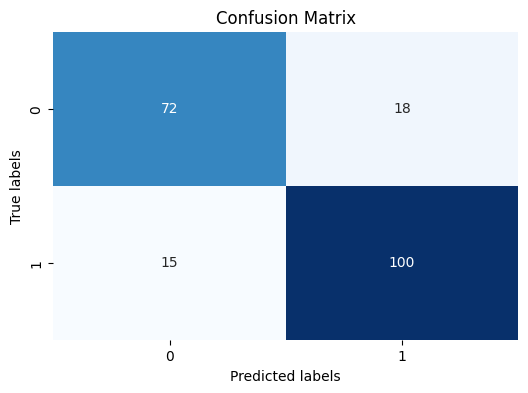

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Separate features and target
X = df.drop(columns=['target'])
y = df['target']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train Gaussian Naive Bayes classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred, digits=2, output_dict=False, zero_division='warn')
print("\nClassification Report:")
print(class_report)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**Now i use the features with the highest absolute correlation coefficients for classification:**

***keep features with correlation > 0.25***

In [ ]:
# Calculate the correlation of each feature with the label
correlations1 = df.corr()['target'][:-1]  # Exclude the correlation of Y with itself

# Get the absolute value of correlations
abs_correlations1 = correlations1.abs()

# Sort the correlations by absolute value in descending order
sorted_correlations1 = abs_correlations1.sort_values(ascending=False)

# Print the sorted correlations
print("Correlation of each feature with the label:")
print(sorted_correlations1)

# Define a threshold for relevance, e.g., keep features with correlation > 0.25
threshold = 0.25
relevant_features1 = sorted_correlations1[sorted_correlations1 > threshold].index.tolist()

# Print the most relevant features
print("Most relevant features based on correlation:")
print(relevant_features1)

Correlation of each feature with the label:
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64
Most relevant features based on correlation:
['oldpeak', 'exang', 'cp', 'thalach', 'ca', 'slope', 'thal', 'sex']


In [ ]:
selected_columns = ['oldpeak', 'exang', 'cp', 'thalach', 'ca', 'slope', 'thal', 'sex']
x_new = df[selected_columns]
y_new = df['target']

Confusion Matrix:
[[ 76  14]
 [ 14 101]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        90
           1       0.88      0.88      0.88       115

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



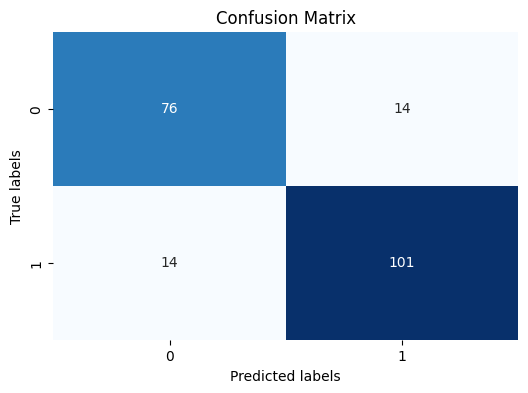

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train_new , X_test_new , y_train_new , y_test_new  = train_test_split(x_new, y_new, test_size=0.2, random_state=24)

# Standardize features by removing the mean and scaling to unit variance
scaler1 = StandardScaler()
X_train_new = scaler1.fit_transform(X_train_new)
X_test_new = scaler1.transform(X_test_new)

# Create and train Gaussian Naive Bayes classifier
classifier1 = GaussianNB()
classifier1.fit(X_train_new, y_train_new)

# Predicting the Test set results
y_pred1 = classifier1.predict(X_test_new)

# Confusion Matrix
conf_matrix1 = confusion_matrix(y_test_new, y_pred1)
print("Confusion Matrix:")
print(conf_matrix1)

# Classification Report
class_report1 = classification_report(y_test_new, y_pred, digits=2, output_dict=False, zero_division='warn')
print("\nClassification Report:")
print(class_report1)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix1, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

***keep features with correlation > 0.3***

In [ ]:
# Calculate the correlation of each feature with the label
correlations2 = df.corr()['target'][:-1]  # Exclude the correlation of Y with itself

# Get the absolute value of correlations
abs_correlations2 = correlations2.abs()

# Sort the correlations by absolute value in descending order
sorted_correlations2 = abs_correlations2.sort_values(ascending=False)

# Print the sorted correlations
print("Correlation of each feature with the label:")
print(sorted_correlations2)

# Define a threshold for relevance, e.g., keep features with correlation > 0.3
threshold = 0.3
relevant_features2 = sorted_correlations2[sorted_correlations2 > threshold].index.tolist()

# Print the most relevant features
print("Most relevant features based on correlation:")
print(relevant_features2)

Correlation of each feature with the label:
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64
Most relevant features based on correlation:
['oldpeak', 'exang', 'cp', 'thalach', 'ca', 'slope', 'thal']


In [ ]:
selected_columns = ['oldpeak', 'exang', 'cp', 'thalach', 'ca', 'slope', 'thal']
x_new2 = df[selected_columns]
y_new2 = df['target']

Confusion Matrix:
[[73 17]
 [17 98]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        90
           1       0.85      0.85      0.85       115

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205



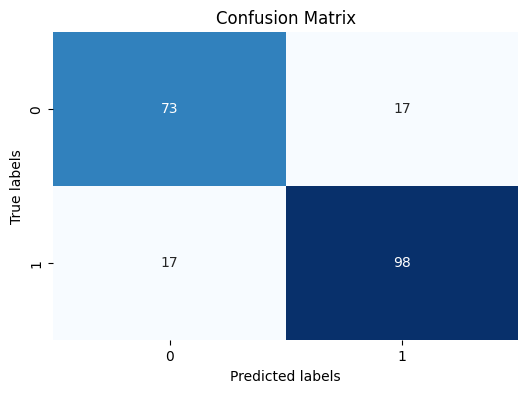

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train_new2 , X_test_new2 , y_train_new2 , y_test_new2  = train_test_split(x_new2, y_new2, test_size=0.2, random_state=24)

# Standardize features by removing the mean and scaling to unit variance
scaler2 = StandardScaler()
X_train_new2 = scaler2.fit_transform(X_train_new2)
X_test_new2 = scaler2.transform(X_test_new2)

# Create and train Gaussian Naive Bayes classifier
classifier2 = GaussianNB()
classifier2.fit(X_train_new2, y_train_new2)

# Predicting the Test set results
y_pred2 = classifier2.predict(X_test_new2)

# Confusion Matrix
conf_matrix2 = confusion_matrix(y_test_new2, y_pred2)
print("Confusion Matrix:")
print(conf_matrix2)

# Classification Report
class_report2 = classification_report(y_test_new2, y_pred2, digits=2, output_dict=False, zero_division='warn')
print("\nClassification Report:")
print(class_report2)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

***And when I made the threshold larger than 0.3, the accuracy dropped below 80% !!!***

***So, the best case is for a threshold of 0.25, which is 86% accuracy, and we consider this model.***

***Selecting 5 data from the test data set randomly and comparing the actual output with the predicted output:***

In [ ]:
import random
# Set the random seed
random.seed(24)

# Randomly select 5 indices from the test set
random_indices = random.sample(range(len(X_test_new)), 5)

print("Randomly selected 5 data points:")
for idx in random_indices:
    print(f"Index: {idx}")
    print(f"Actual Output: {y_test_new.iloc[idx]}")
    print(f"Predicted Output: {y_pred1[idx]}")
    print()

Randomly selected 5 data points:
Index: 182
Actual Output: 1
Predicted Output: 1

Index: 98
Actual Output: 1
Predicted Output: 1

Index: 149
Actual Output: 1
Predicted Output: 1

Index: 46
Actual Output: 0
Predicted Output: 0

Index: 55
Actual Output: 1
Predicted Output: 1



In [ ]:
import random
# Set the random seed
random.seed(24)

# Randomly select 5 indices from the test set
random_indices = random.sample(range(len(X_test_new)), 10)

print("Randomly selected 5 data points:")
for idx in random_indices:
    print(f"Index: {idx}")
    print(f"Actual Output: {y_test_new.iloc[idx]}")
    print(f"Predicted Output: {y_pred1[idx]}")
    print()

Randomly selected 5 data points:
Index: 182
Actual Output: 1
Predicted Output: 1

Index: 98
Actual Output: 1
Predicted Output: 1

Index: 149
Actual Output: 1
Predicted Output: 1

Index: 46
Actual Output: 0
Predicted Output: 0

Index: 55
Actual Output: 1
Predicted Output: 1

Index: 42
Actual Output: 0
Predicted Output: 0

Index: 49
Actual Output: 1
Predicted Output: 1

Index: 43
Actual Output: 0
Predicted Output: 0

Index: 171
Actual Output: 1
Predicted Output: 0

Index: 174
Actual Output: 1
Predicted Output: 1

